In [3]:
# Create figures in Python that handle LaTeX, and save images to files in my
# preferred formatting. I typically place this code in the root of each of my
# projects, and import using:
# from latexify import *
# which will also run the latexify() function on the import.

# Based on code from https://nipunbatra.github.io/blog/2014/latexify.html

import matplotlib
import matplotlib.pyplot as plt
from math import sqrt

#Back-end to use depends on the system
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
# matplotlib.use('pgf')
# from matplotlib.backends.backend_pgf import FigureCanvasPgf
# matplotlib.backend_bases.register_backend('ps', FigureCanvasPgf)

import seaborn as sns
sns.set_style("white")

#my preferred palette. From
#https://seaborn.pydata.org/tutorial/color_palettes.html: "The cubehelix color
#palette system makes sequential palettes with a linear increase or decrease in
#brightness and some variation in hue. This means that the information in your
#colormap will be preserved when converted to black and white (for printing) or
#when viewed by a colorblind individual."

# I typically set the number of colors (below, 8) to the distinct colors I need
# in a given plot, so as to use the full range.
sns.set_palette(sns.color_palette("cubehelix", 8))


# The following is the latexify function. It allows you to create 2 column or 1
# column figures. You may also wish to alter the height or width of the figure.
# The default settings are good for most cases. You may also change the
# parameters such as labelsize and fontsize based on your classfile.
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.
    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples
    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1, 2])

    if fig_width is None:
        fig_width = 6.9 if columns == 1 else 13.8  # width in inches #3.39

    if fig_height is None:
        golden_mean = (sqrt(5) - 1.0) / 2.0    # Aesthetic ratio
        fig_height = fig_width * golden_mean  # height in inches

    MAX_HEIGHT_INCHES = 16.0
    if fig_height > MAX_HEIGHT_INCHES:
        print(("WARNING: fig_height too large:" + fig_height +
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches."))
        fig_height = MAX_HEIGHT_INCHES

    params = {
            # 'backend': 'ps',
           #   'pgf.rcfonts': False,
           #   'pgf.preamble': ['\\usepackage{gensymb}', '\\usepackage[dvipsnames]{xcolor}'],
           #   "pgf.texsystem": "pdflatex",
             # 'text.latex.preamble': ['\\usepackage{gensymb}', '\\usepackage[dvipsnames]{xcolor}'],
              'text.latex.preamble': '\\usepackage{mathptmx}',
              #values below are useful defaults. individual plot fontsizes are
              #modified as necessary.
              'axes.labelsize': 15,  # fontsize for x and y labels
              'axes.titlesize': 15,
              'font.size': 10,
              'legend.fontsize': 15,
              'xtick.labelsize': 15,
              'ytick.labelsize': 15,
              'text.usetex': True,
              'figure.figsize': [fig_width, fig_height],
              'font.family': 'serif',
              'font.serif': 'Times',
               'lines.linewidth': 1,
               'lines.markersize':1,
               'xtick.major.pad' : 2,
               'ytick.major.pad' : 2,
                'axes.xmargin' :  .0,  # x margin.  See `axes.Axes.margins`
                'axes.ymargin' : .0,  # y margin See `axes.Axes.margins`
              }

    matplotlib.rcParams.update(params)

def saveimage(name, fig = plt, extension = 'pdf', folder = 'plots/'):
    sns.despine()

    #Minor ticks off by default in matplotlib
    # plt.minorticks_off()

    #grid being off is the default for seaborn white style, so not needed.
    # plt.grid(False, axis = "x")
    # plt.grid(False, axis = "y")
    
    fig.savefig('{}{}.{}'.format(folder,name, extension), bbox_inches = 'tight')

latexify()

In [2]:
def weighted_std(values, weights, axis=0):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights, axis=axis)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights, axis=axis)
    return np.sqrt(variance)

In [5]:
## Import the required Libraries
from __future__ import absolute_import, division, print_function
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import healpy as hp

import h5py



print(tf.__version__)

from data_utils import dataloaders

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
#set_matplotlib_formats('png')
import matplotlib

plt.style.use('default')
plt.style.use('./MNRAS_Style.mplstyle')
import matplotlib.pyplot as plt

import os

2.1.0


In [12]:
def get_color(name):
    color_map = {
            "blue": "#1976D2",
            "lblue": "#4FC3F7",
            "red": "#E53935",
            "green": "#43A047",
            "lgreen": "#8BC34A",
            "purple": "#673AB7",
            "cyan": "#4DD0E1",
            "magenta": "#E91E63",
            "yellow": "#F2D026",
            "black": "#333333",
            "grey": "#9E9E9E",
            "orange": "#FB8C00",
            "amber": "#FFB300",
            "brown": "#795548",
        }
    aliases = {
            "b": "blue",
            "r": "red",
            "g": "green",
            "k": "black",
            "m": "magenta",
            "c": "cyan",
            "o": "orange",
            "y": "yellow",
            "a": "amber",
            "p": "purple",
            "e": "grey",
            "lg": "lgreen",
            "lb": "lblue",
        }
    return color_map[name]

In [13]:
colors = [get_color(i) for i in ["blue", "green", "lgreen", "red", "purple", "yellow", "grey", "lblue", "magenta", "green", "brown", "black", "orange"]]

In [14]:
# load trained model
import tensorflow.keras.backend as K
def custom_loss(y_true, y_pred):
    sig = K.mean(K.std(y_true - y_pred))
    return K.log(sig)  + (keras.metrics.mse(y_true, y_pred) / (2*K.square(sig))) + 10

In [15]:
dirstr = '/mnt/home/tmakinen/ceph/pca_ska/avg/test/'

In [39]:
y_true =  np.squeeze(np.concatenate([
    np.load(dirstr + 'cosmo_sim%03d.npy'%(i+1)) for i in range(90, 100)]))

pca3 = np.squeeze(np.concatenate([
    np.load(dirstr + 'pca3_sim%03d.npy'%(i+1)) for i in range(90, 100)]))
pca6 = np.squeeze(np.concatenate([
    np.load(dirstr + 'pca6_sim%03d.npy'%(i+1)) for i in range(90, 100)]))

# pca5 = np.squeeze(np.concatenate([
#     np.load(dirstr + 'pca5_sim%03d.npy'%(i+1)) for i in range(90, 100)]))

pca7 = np.squeeze(np.concatenate([
    np.load(dirstr + 'pca7_sim%03d.npy'%(i+1)) for i in range(90, 100)]))


pca8 = np.squeeze(np.concatenate([
    np.load(dirstr + 'pca8_sim%03d.npy'%(i+1)) for i in range(90, 100)]))


y_noisy = np.squeeze(np.concatenate([
    np.load(dirstr + 'cosmo_noisy_sim%03d.npy'%(i+1)) for i in range(90, 100)]))

#y_preds = np.squeeze(np.load('/mnt/home/tmakinen/repositories/21cm-unet/bin1_analysis/y_pred_all.npy'))

#y_preds = [np.squeeze(np.load('/mnt/home/tmakinen/jobs/bin1/model_mse_%d/y_pred.npy'%(i+1))) for i in range(5) if i+1]
#pca_res_arr = np.load('pca_radial_residuals.npy')

#ensemble_radial_residuals = np.load('ensemble_radial_residuals.npy')
#model_preds = ensemble_radial_residuals
#w = np.load('ensemble_weights.npy')

k_para = np.linspace(0, 0.2, 32)

In [136]:
np.save('/mnt/home/tmakinen/plot-dat/pca3', pca3)
np.save('/mnt/home/tmakinen/plot-dat/pca5', pca5)
np.save('/mnt/home/tmakinen/plot-dat/pca6', pca6)
np.save('/mnt/home/tmakinen/plot-dat/pca7', pca7)
np.save('/mnt/home/tmakinen/plot-dat/pca8', pca8)
np.save('/mnt/home/tmakinen/plot-dat/y_noisy', y_noisy)
np.save('/mnt/home/tmakinen/plot-dat/y_preds_logp', np.array(y_preds))

In [40]:
y_preds = []
for i in range(5):
    y_preds.append(np.squeeze(keras.models.load_model('/mnt/home/tmakinen/jobs2/nu_avg/results_logp_1_161/best_model_%d.h5'%(i+1), 
                                           custom_objects={'custom_loss': custom_loss}).predict(np.expand_dims(pca3, axis=-1), batch_size=48)))

np.save('/mnt/home/tmakinen/repositories/21cm-unet/bin1_analysis/y_pred2_all.npy', np.array(y_preds))

In [26]:
y_preds = np.squeeze(np.load('/mnt/home/tmakinen/repositories/21cm-unet/bin1_analysis/y_pred2_all.npy'))

In [7]:
N_NU = 32
N_START = 1
N_STOP = 174
N_SKIP = (N_STOP - N_START) // N_NU
# get the spetrum of frequenies covered in units of MHz
(bn,nu_bot,nu_top,z_bot,z_top) = np.loadtxt("/mnt/home/tmakinen/repositories/21cm-unet/nuTable.txt").T
nu_arr = ((nu_bot + nu_top)/2.)[:-1]
#nu_arr = np.array([np.mean(i,axis=0) for i in np.split(nu_arr,N_NU)])
nu_arr = nu_arr[N_START:N_STOP][::N_SKIP]

In [28]:
def make_temp_plot(nu_indx):
    latexify(fig_width=8.5, fig_height=3.5)
    #plt.style.use('default')
    #plt.style.use('./MNRAS_Style.mplstyle')
    for i in nu_indx:
    #for i in range(len(y_true.T)): # over every frequency band
        if i % 1 == 0 :
            best_case = np.ravel(pca6.T[i].T)
            #xd = np.ravel(x_data.T[i].T)
            yd = np.ravel(y_true.T[i].T)
            yp = [np.ravel(y_p.T[i].T) for y_p in y_preds]
            yp_avg = np.mean(np.array(yp), axis=0)
            #kde_gauss = KernelDensity(bandwidth=0.6, kernel='gaussian')

            x_grid = np.linspace(-2, 3, num=1000)

            cs = ['r', 'b']
            lb = ['PCA-3 input', r'$y_{true}$']
            l_list = []
    #         for j,l in enumerate([xd[::4], yd[::4]]):
    #             kde_gauss.fit(l.reshape(-1,1))

    #             plt.plot(x_grid, np.exp(kde_gauss.score_samples(x_grid.reshape(-1, 1))),
    #                 marker='', drawstyle='steps-mid', color=cs[j], label=lb[j])


            plt.hist(np.ravel(best_case), color=colors[0], label='PCA-6 residual', bins=100, density=True, histtype='step')
    #         for m in range(len(yp)):
    #             plt.hist(np.ravel(yp[m]), color=colors[m], label=labels[m], bins = 100, density=True, alpha=0.6, histtype='step')

            plt.hist(yp_avg, color=colors[1], label=r'$\texttt{deep21}$', linewidth=2, bins=100, histtype='step', density=True)
            plt.hist(np.ravel(yd), color='k', linewidth=2, label=r'Truth', bins = 100, density=True, histtype='step')

            plt.xlim(np.mean(yd) - 6*np.std(yd), np.mean(yd) + 6*np.std(yd))
            plt.title(r'$\nu$ =  %d MHz'%(nu_arr[i]))
            plt.xlabel(r'$T(\nu)$ [mK]', fontsize=15)
            plt.ylabel(r'$p(T(\nu))$')
            plt.legend()
            #plt.savefig('/mnt/home/tmakinen/repositories/21cm-unet/figures/temp_{}.png'.format(nu_arr[i]), transparent=False)
            plt.show()

(-2, 4)

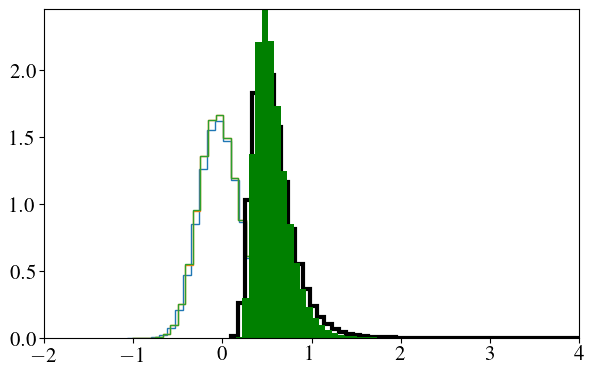

In [30]:
plt.style.use('default')
latexify()
plt.hist((pca3).T[15].T.flatten(), bins=50, density=True, histtype='step')
#plt.hist((pca5).T[15].T.flatten(), bins=50, density=True, histtype='step')
plt.hist((pca6).T[15].T.flatten(), bins=50, density=True, histtype='step')
plt.hist((pca7).T[15].T.flatten(), bins=50, density=True, histtype='step')
plt.hist((y_true).T[15].T.flatten(), bins=50, density=True, color='k', linewidth=3, histtype='step')
plt.hist(np.squeeze(y_preds[0]).T[15].T.flatten(), bins=50, density=True, color='g')
plt.xlim(-2, 4)

In [31]:
import tensorflow.keras.backend as K
#print(K.mean(tf.keras.losses.kullback_leibler_divergence(y_true[:7680], np.squeeze(y_preds)[0][:7680])))

In [40]:
#print(K.mean(tf.keras.losses.kullback_leibler_divergence(y_true[:7680], pca6[:7680])))

In [32]:
def make_temp_dub(nu_indx):
    latexify(fig_width=8.5, fig_height=3.5)
    #plt.style.use('default')
    #plt.style.use('./MNRAS_Style.mplstyle')
    fig,axs = plt.subplots(1, len(nu_indx))
    for j,i in enumerate(nu_indx):
    #for i in range(len(y_true.T)): # over every frequency band
        if i % 1 == 0 :
            ax = axs[j]
            best_case = np.ravel(pca6.T[i].T)
            #xd = np.ravel(x_data.T[i].T)
            yd = np.ravel(y_true.T[i].T)
            yp = [np.ravel(y_p.T[i].T) for y_p in y_preds]
            yp_avg = np.average(np.array(yp), axis=0, weights=w_logp)
            #kde_gauss = KernelDensity(bandwidth=0.6, kernel='gaussian')

            x_grid = np.linspace(-2, 3, num=1000)

            cs = ['r', 'b']
            lb = ['PCA-3 input', r'$y_{true}$']
            l_list = []
    #         for j,l in enumerate([xd[::4], yd[::4]]):
    #             kde_gauss.fit(l.reshape(-1,1))

    #             plt.plot(x_grid, np.exp(kde_gauss.score_samples(x_grid.reshape(-1, 1))),
    #                 marker='', drawstyle='steps-mid', color=cs[j], label=lb[j])


            ax.hist(np.ravel(best_case), color='#365193', label='PCA-6', bins=100, density=True, linestyle='dashdot', histtype='step')
    #         for m in range(len(yp)):
    #             plt.hist(np.ravel(yp[m]), color=colors[m], label=labels[m], bins = 100, density=True, alpha=0.6, histtype='step')

            ax.hist(yp_avg, color=colors[1], label=r'$\texttt{deep21}$', linewidth=2, bins=100, histtype='step', density=True)
            ax.hist(yp_avg, color=colors[1], linewidth=2, bins=100, alpha=0.2, density=True)

            ax.hist(np.ravel(yd), color='k', linewidth=2, label=r'Truth', bins = 100, density=True, histtype='step')

            ax.set_xlim(np.mean(yd) - 6*np.std(yd), np.mean(yd) + 6*np.std(yd))
            ax.set_title(r'$\nu$ =  %d MHz'%(nu_arr[i]))
            ax.set_xlabel(r'$T(\nu)$ [mK]', fontsize=15)
            ax.set_ylabel(r'$p(T_\nu)$')
            
            if j == 0:
                ax.legend(fontsize=11, framealpha=0.1)
            #plt.savefig('/mnt/home/tmakinen/repositories/21cm-unet/figures/temp_{}.png'.format(nu_arr[i]), transparent=False)
    plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


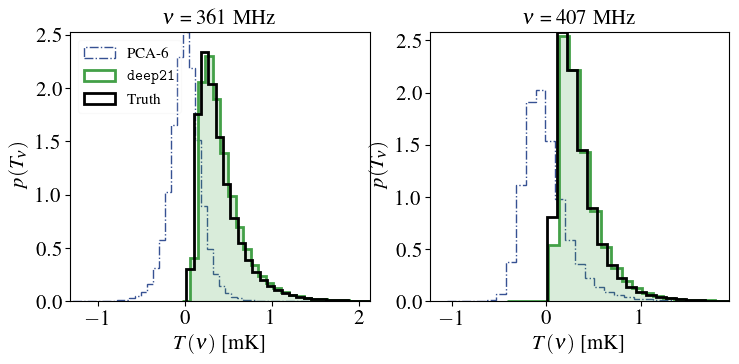

In [20]:
make_temp_dub([3,16])

In [33]:
def compute_logp(y_true, y_pred):
    return np.array([np.mean(((y_true[i] - y_pred[i])**2)/(np.mean(np.std(y_true[i] - y_pred[i])**2)) + np.log(np.std(y_true[i] - y_pred[i]))) for i in range((y_true.shape[0]))])

def compute_mse(y_true, y_pred):
    return np.array([np.mean((y_true[i] - y_pred[i])**2) for i in range(y_true.shape[0])])

In [41]:
# compute the mse
mse = []
nu_indx = np.arange(32)
#mse_noisy = (np.array([np.mean((y_true[i] - y_noisy[i])**2) for i in range((y_true[0].shape[0]))]))


for j,y_pred in enumerate(y_preds):
    y_t = y_true.T[0:].T
    y_p = y_pred.T[0:].T
    mse.append(compute_mse(y_true, y_pred))
    
mse_pca = compute_mse(y_true, pca6)
mse_noise = compute_mse(y_true, y_noisy)

logp_noise = compute_logp(y_true, y_noisy)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


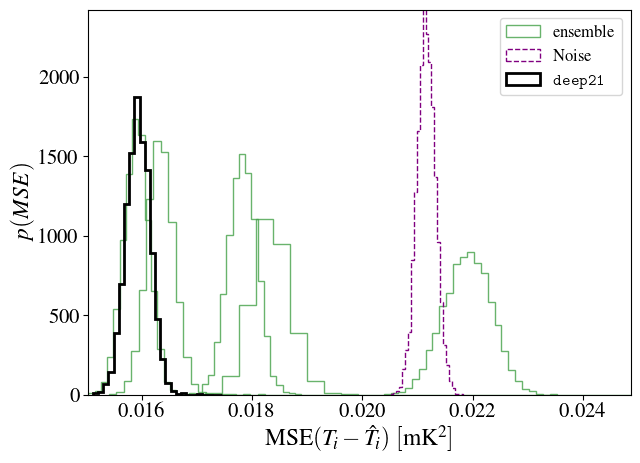

In [42]:
# compute mse for each input brick in validation set and then histogram the output
plt.style.use('default')
latexify(7, 5)

labels = ['model 1', 'model 2', 'model 3', 'model 4', 'model 5']
logp = []
mse = []
w_mse = []
w_logp = []

for i,y_pred in enumerate(np.squeeze(y_preds)):
    logp.append(compute_logp(y_true, y_pred))
    mse.append(compute_mse(y_true, y_pred))
    
    
    

#plt.style.use('./MNRAS_Style.mplstyle')
plt.figure()

# MSE PLOT

#plt.subplot(121)
for m in range(len(mse)):
    label = None
    if m >= 4:
        label = 'ensemble'
    plt.hist(mse[m], density=True, bins=25, label=label, color=colors[1], histtype='step', alpha=0.8)
    w_mse.append(1/np.array(np.mean(mse[m])))
    
    w_logp.append(np.exp(np.mean(logp[m])))
    
#np.save('ensemble_weights', np.array(w))

ensemble_average = np.average(np.squeeze(np.array(y_preds)), axis=0, weights=np.array(w_mse))
mse_avg = compute_mse(y_true, ensemble_average)

plt.hist(mse_noise, density=True, bins=25, histtype='step', linestyle='--', color = 'purple', label='Noise')
    
plt.hist(mse_avg, density=True, bins=25, 
         label=r'$\texttt{deep21}$', color='k', linewidth=2,histtype='step')

plt.xlabel(r'MSE$(T_i - \hat{T}_i)\ \rm [mK^2]$', fontsize=17)
plt.ylabel(r'$p(MSE)$', fontsize=17)

plt.legend(fontsize=12)

# LOGP PLOT

# plt.subplot(122)
# for m in range(len(logp)):
#     plt.hist(mse[m], density=True, bins=25, label=labels[m], color=colors[m], histtype='step', alpha=0.6)
#     w_logp.append(np.exp(np.mean(logp[m])))
    
# #np.save('ensemble_weights', np.array(w))

# ensemble_average = np.average(np.array(y_preds), axis=0, weights=np.array(w_logp))
# logp_avg = compute_mse(y_true, ensemble_average)

# plt.hist((mse_noise), density=True, bins=25,  histtype='step', linestyle='--', color = 'purple', label='sim noise')
    
# plt.hist((logp_avg), density=True, bins=25, 
#          label=r'$\texttt{deep21}$ ensemble', color='k', linewidth=2,histtype='step')


# #plt.hist(mse_pca, normed=True, bins=25, label='PCA-6')
# #plt.title('MSE computed brick-wise on val data')
# plt.xlabel(r'MSE$(T_i - \hat{T}_i)\ \rm [mK^2]$', fontsize=17)
# plt.ylabel(r'$p(MSE)$', fontsize=17)
#plt.xlim(0.0075, 0.013)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.legend(fontsize=12)
plt.show()

In [43]:
# CLEANING RESIDUALS ARE 15% over the noise contribution

In [44]:
models = [np.array_split(y, len(y) / 768) for y in y_preds]

In [45]:
y_preds = [np.squeeze(y) for y in y_preds]

In [77]:
from scipy import fftpack

def radialPka(in_map, n_nu=32, num_sims=1):
    # global params
    MAP_NSIDE = 256
    SIM_NSIDE = MAP_NSIDE
    WINDOW_NSIDE = 8
    # resolution of the outgoing window
    NPIX_WINDOW = int((MAP_NSIDE/WINDOW_NSIDE)**2)
    # actual side length of window
    WINDOW_LENGTH = int(np.sqrt(NPIX_WINDOW))
    nwinds = int(hp.nside2npix(WINDOW_NSIDE))
    
    # survey volume
    V = (nwinds*WINDOW_LENGTH*WINDOW_LENGTH)
    
    out = []
    for sim in range(num_sims):
        map_s = np.array_split(in_map, len(in_map) // nwinds)[sim]
        
        map_s= np.reshape(map_s, (V, n_nu))
        #map_s = np.array_split(map_s, V, axis=0)
        power_spec = np.average(np.array([np.abs(fftpack.rfft(j))**2 for j in map_s]),axis=0)#/ V
        
        mid = (len(power_spec)//2) + 1
        
        out.append(power_spec[1:mid])
        
    k_para = np.linspace(0.01, 0.2, num=len(out[-1]))
    
    return k_para, np.mean((np.array(out)), axis=0)

In [78]:
            
## COMBINE RESULTS ##

# get ensemble average and std
ensemble_ps = [radialPka(mdl, num_sims=10) for mdl in y_preds]
nn_radial = np.average(ensemble_ps, axis=0, weights=w_mse)
nn_std = weighted_std(ensemble_ps, axis=0, weights=w_mse)

# get ensemble RESIDUAL average and std
ensemble_res = [radialPka(mdl - y_true, num_sims=10) for mdl in y_preds]
nn_res_av = np.average(ensemble_res, axis=0, weights=w_mse)
nn_res_std = weighted_std(ensemble_res, axis=0, weights=w_mse)


# now average all 10 skies together
ps_pca6 = radialPka(pca6, num_sims=10)
ps_pca6_res = radialPka(pca6 - y_true, num_sims=10)

ps_pca3 = radialPka(pca3, num_sims=10)
ps_pca3_res = radialPka(pca3 - y_true, num_sims=10)

ps_true = radialPka(y_true, num_sims=10)

ps_noise = radialPka(y_noisy, num_sims=10)
ps_noise_res = radialPka(y_noisy - y_true, num_sims=10) 

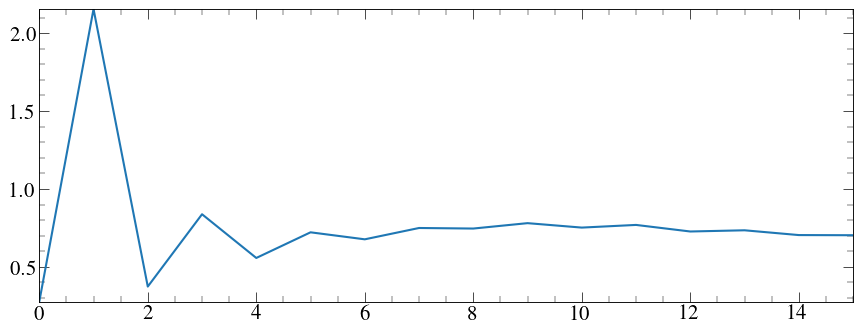

In [79]:
plt.plot(nn_radial)

In [20]:
sigp_6 = np.sqrt(np.diag(np.cov(np.array([nn_radial, ps_true]).T)))
sigp_6

array([0.13650226, 0.07052011, 0.02097565, 0.04742445, 0.03509961,
       0.02728488, 0.02271609, 0.01995813, 0.01828158, 0.01635162,
       0.01550049, 0.01185772, 0.01171015, 0.01103151, 0.01050956,
       0.01384366, 0.01335757, 0.01738753, 0.01652169, 0.0196416 ,
       0.01870881, 0.02018298, 0.01930729, 0.01917437, 0.01832274,
       0.01815891, 0.01689303, 0.01760029, 0.01594802, 0.01745697,
       0.01560838, 0.02256631])

ValueError: x and y must have same first dimension, but have shapes (32,) and (31,)

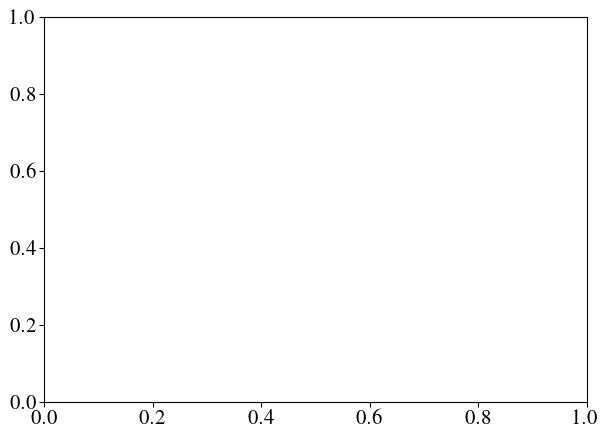

In [50]:
sigp_nn = np.sqrt(np.diag(np.correlate(nn_radial, ps_true, mode='same')))
#sigp_nn = np.sqrt(np.diag(np.cov(np.array([nn_radial, ps_true]).T)))
plt.plot(k_para, (nn_radial - ps_true) / np.diag(sigp_nn))
sigp_6 = np.sqrt(np.diag(np.correlate(ps_pca6, ps_true, mode='same')))
#sigp_6 = np.sqrt(np.diag(np.cov(np.array([ps_pca6, ps_true]).T)))

plt.plot(k_para, (ps_pca6 - ps_true) / np.diag(sigp_6))
plt.ylabel(r'$\eta$')
#plt.yscale('log')
plt.ylim(-1.5, 0.5)
plt.xlabel(r'$k_\parallel\ $[$h$ Mpc$^{-1}$]')

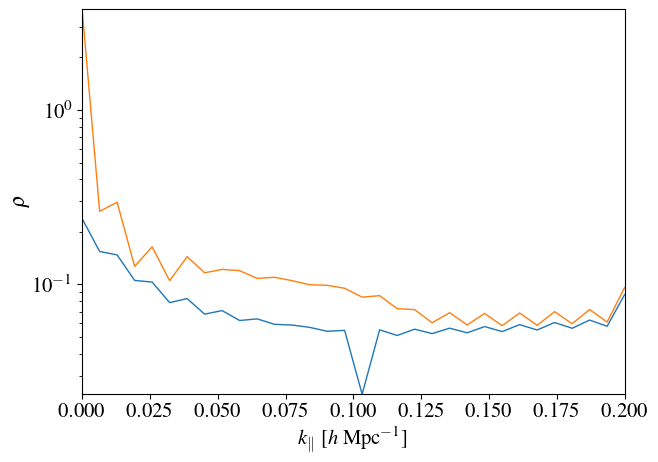

In [22]:
plt.plot(k_para, nn_res_av / np.diag(sigp_nn))
plt.plot(k_para, ps_pca6_res / np.diag(sigp_6))
plt.ylabel(r'$\rho$')
plt.xlabel(r'$k_\parallel\ $[$h$ Mpc$^{-1}$]')
plt.yscale('log')

Text(0.5, 0, '$k_\\parallel\\ $[$h$ Mpc$^{-1}$]')

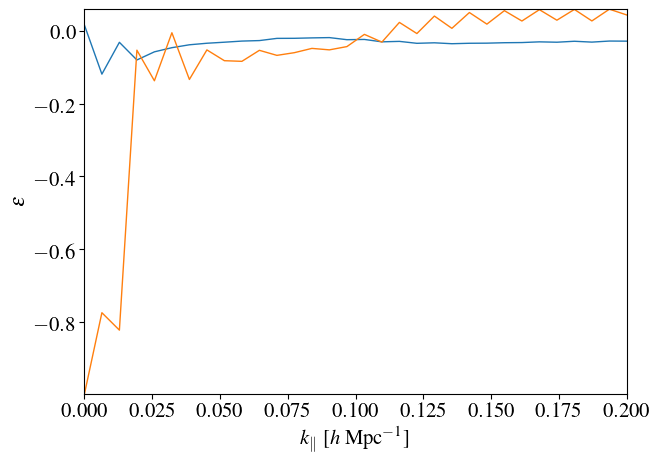

In [23]:
plt.plot(k_para, (nn_radial - ps_true) / ps_true)
plt.plot(k_para, (ps_pca6 - ps_true) / ps_true)
plt.ylabel(r'$\epsilon$')
plt.xlabel(r'$k_\parallel\ $[$h$ Mpc$^{-1}$]')

In [ ]:
ps_true

In [219]:
ps_true = radialPka(y_true[:768], num_sims=1)

In [244]:
nn_r = radialPka(y_preds[0][:768], num_sims=1)

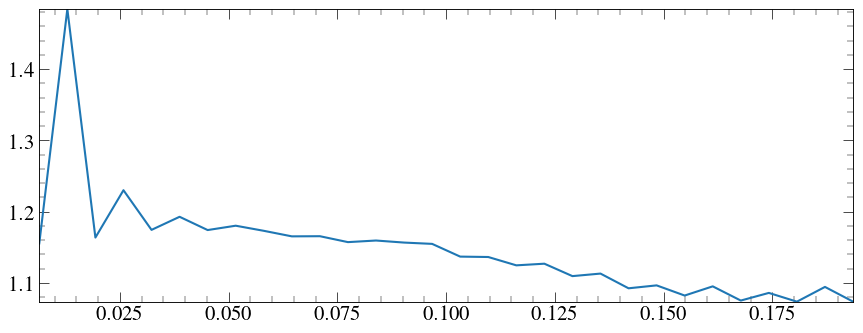

In [251]:
plt.plot(k_para[1:-1], ps_true[1:-1])
#plt.plot(k_para[1:-1], nn_r[1:-1])
#plt.yscale('log')
#plt.xscale('log')

(32,)

ValueError: x and y must be the same size

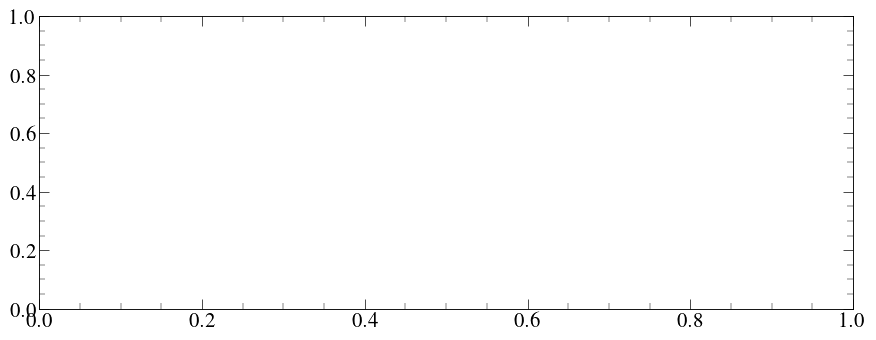

In [136]:
plt.scatter(k_para[:], ps_true[:]**2, s=25)
#plt.plot(k_para, ps_pca6_res / np.diag(sigp_6))
plt.ylabel(r'$P(k_\parallel)$')
plt.xlabel(r'$k_\parallel\ $[$h$ Mpc$^{-1}$]')
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(-1, 2)

In [96]:
pk1 = np.loadtxt('/mnt/home/tmakinen/ceph/ska_sims/run_pkEH_s1001/pk.txt')
pk0 = np.loadtxt('/mnt/home/tmakinen/ceph/ska_sims/run_pkEH_smooth_s1001/pk.txt')

In [100]:
pk1.T[1] / pk0.T[1]

array([1.00641145, 1.00641184, 1.00641223, ..., 1.0291569 , 1.02917537,
       1.0291938 ])

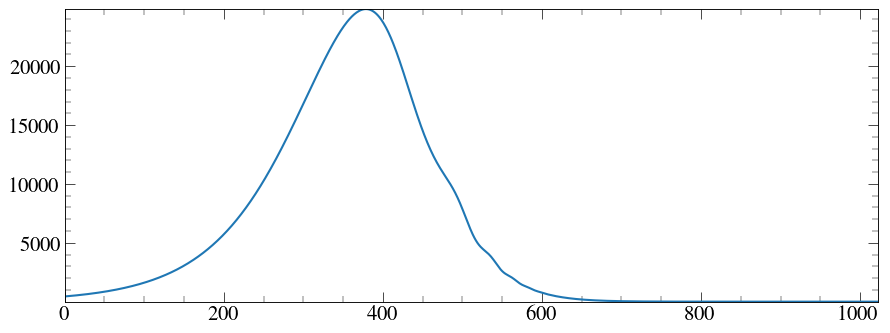

In [105]:
plt.plot(pk1.T[1])
#plt.ylim(0.98, 1.02)

In [75]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='<->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops, rasterized=True)

In [75]:
k_para = np.linspace(0, 0.2, num=(len(ps_noise) // 2)+1)

In [96]:
## compute power spectra residual
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
import healpy as hp


plt.style.use('default')
latexify(fig_width=10.5, fig_height=3.8)



plt.style.use('./MNRAS_Style.mplstyle')
#%matplotlib inline
#sns.set_palette(sns.color_palette("deep", 8))

def dubplot(ex):

    labels = ['model 1', 'model 2', 'model 3', 'model 4', 'model 5']
    colors = [get_color(i) for i in ["purple", "green", "lgreen", "red", "purple", "yellow", "grey", "lblue", "magenta", "green", "brown", "black", "orange"]]
    N_NU = 32
    N_START = 0
    N_STOP = 32*5
    N_SKIP = (N_STOP - N_START) // N_NU
    # get the spetrum of frequenies covered in units of MHz
    (bn,nu_bot,nu_top,z_bot,z_top) = np.loadtxt("/mnt/home/tmakinen/repositories/21cm-unet/nuTable.txt").T
    nu_arr = ((nu_bot + nu_top)/2.)[:-1]
    nu_arr = nu_arr[N_START:N_STOP]#[::N_SKIP]
    nu_arr = np.array([np.mean(i,axis=0) for i in np.split(nu_arr,N_NU)])
    
    # pull in noisy cosmo to calculate uncertainties
    noisy_cosmo_test = np.array_split(y_noisy - y_true, y_noisy.shape[0] / 768) #np.concatenate([np.load('/mnt/home/tmakinen/ceph/data_ska/nu_bin_1/test/noisy_cosmo3_sim%03d.npy'%(i+1)) for i in range(90,100)])
    #noisy_cosmo_test = np.array_split(noisy_cosmo, noisy_cosmo.shape[0] /768)
    pca_6_test = np.array_split(pca6 - y_true, pca6.shape[0] / 768)
    pca_3_test =  np.array_split(pca3 - y_true, pca3.shape[0] / 768)
    #pca_7 = np.mean(np.array_split(pca7, pca7.shape[0] / 768), axis=0)
    cosmo_test = (np.array_split(y_true, y_true.shape[0] / 768)) #[:769] 

    #n_cosmo = np.mean(np.array_split(yave, yave.shape[0] / 768), axis=0) 

    labels=labels
    models = [np.array_split(y, len(y) / 768) for y in y_preds]
    average = np.array_split(ensemble_average, len(ensemble_average) /768)
    rearr = np.load('rearr_nside8.npy') 
    pca_res = []
    nn_res = []
    nn_Cl_mean = []
    nn_res_all = []
    pca6_res_all = []
    pca7_res_all = []
    cosmo_Cl = []
    pca_Cl = []
    
    noise_res_all = []
    
    for i in ex:
        
        
        
        # Get Cls for COSMO spectrum
        # loops over 10 test set skies
        cos = []
        for cosmo in cosmo_test:
            cosmo0 = (cosmo.T[i].T).flatten()
            cosmo0 = cosmo0[rearr]
            alm_cosmo = hp.map2alm(cosmo0)
            Cl_cosmo = hp.alm2cl(alm_cosmo)
            cos.append(Cl_cosmo)
        
        Cl_cosmo = np.mean(cos, axis=0)
        cosmo_Cl.append(np.mean(cos, axis=0))
        
        
                
        # Get Cls for NOISY COSMO spectrum
        # loops over 10 test set skies
        noisy_cos = []
        res_noise = []
        for cosmo in noisy_cosmo_test:
            cosmo0 = (cosmo.T[i].T).flatten()
            cosmo0 = cosmo0[rearr]
            alm_cosmo = hp.map2alm(cosmo0)
            Cl_noise= hp.alm2cl(alm_cosmo)
            noisy_cos.append(Cl_noise)
            
            
            # compute residual
            res_noise.append(np.abs(Cl_noise) / Cl_cosmo)
        
        Cl_noise = np.mean(noisy_cos, axis=0)
        noise_ave_res = np.mean(res_noise, axis=0)
        #cosmo_Cl.append(np.mean(noisy_cos, axis=0))
        noise_res_all.append(noise_ave_res)
        
        
        # BUILD FIGURE                

        fig,axs = plt.subplots(1,2)        
        ax = axs[0]
        
        save_pca_res = [pca6_res_all, pca7_res_all]

        # Get Cls for PCA Spectra
                # plot both pca residuals
        cs = ["#365193", colors[0]]
        labs = ['PCA-6', 'PCA-3']        
        for j,test_set in enumerate([pca_6_test]):
        
            pca = []
            for pca_6 in test_set:

                pca0 = (pca_6.T[i].T).flatten()  # choose given freq band, then flatten out all npix*64*64
                pca0 = pca0[rearr]
                alm_pca = hp.map2alm(pca0)
                Cl_pca_6 = hp.alm2cl(alm_pca)
                pca.append(Cl_pca_6)



            # Now compute PCA average residul Cl over test set
            res_pca = []
            for k,p in enumerate(pca):
                res_pca.append( np.abs(pca[k]) / cos[k] )

            pca_ave_res = np.mean(res_pca, axis=0)
            
            save_pca_res[j].append(pca_ave_res)

            # PLOT each PCA Residual
            ax.plot(np.arange(767)[::8], 
                    np.average(res_pca, axis=0)[1::8], 
                    linewidth=2, color=cs[j], label=labs[j], linestyle='dashdot')  
        
        
            # PLOT noise residual
            ax.plot(np.arange(767)[::8], 
                    noise_ave_res[1::8], 
                    linewidth=2, c='purple',label="Noise", linestyle='--')  

            
        # Now look at "posterior" of models 1-5's predictions:

        model_res = []
        for q in range(len(models)):
            model=models[q]
            res_m = []
            for k in range(len(model)):
                pca0 = model[k] - cosmo_test[k]
                pca0 = (pca0.T[i].T).flatten()
                pca0 = pca0[rearr]
                alm_pca = hp.map2alm(pca0)
                Cl_pred = hp.alm2cl(alm_pca)
                 
            # now for each model, evaluate the residual
                res_m.append(np.abs(Cl_pred) / cos[k])
                
            model_res.append(np.mean(res_m, axis=0)[1::8])
            
  
        mu_cl = np.average(model_res, axis=0, weights=np.array(w_logp))
        sig_cl = weighted_std(model_res, weights=np.array(w_logp), axis=0)
        
        # plot average UNet power spectrum with +/- 2sig credibility
        ax.fill_between(np.arange(767)[::8],
                  mu_cl + 3*sig_cl, 
                  mu_cl - 3*sig_cl, 
                  color=colors[1], alpha=0.5, label=r'$\pm 2\sigma$')
        
        ax.plot(np.arange(767)[::8], 
                mu_cl, c='#0D3F2B', 
                linewidth=2, label=r'\texttt{deep21}')
            
            
        # plot resolution of UNet window
        ax.plot(np.ones(100)*(np.pi/hp.pixelfunc.nside2resol(8)), 
                np.linspace(1e-5, 10, num=100), c='k', linestyle=':', label='window resolution')

        ax.set_yscale("log")
        ax.set_xscale("log")
        ax.set_xlabel(r"$\ell$")
        ax.set_ylabel(r"$C_{\ell,{\rm res}}/C_{\ell,{\rm true}}$")
        ax.set_ylim(3e-2, 1)
        
        

            
        nn_res_all.append(np.average(model_res, axis=0, weights=np.array(w_mse)))


            #plt.gcf().set_size_inches((1.25*3.37, 3.37))
            #plt.tight_layout()
       
        print('%03d'%(nu_arr[i]))
        # plt.rc('ytick', labelsize=15) 
        # plt.rc('xtick', labelsize=15) 
        #plt.suptitle('radial pka residual')

        ### ADD IN RADIAL SPECTRUM
            
        #mid = len(ps_pca6_res) // 2 + 1
        
        ax = axs[1]        
        
        
        for j,ps_pca in enumerate([ps_pca6_res, ps_pca3_res]):        
            plt.plot(k_para, 
                     np.abs(ps_pca / ps_true),  
                     c=cs[j], label=labs[j], linewidth=2, 
                     linestyle='dashdot')
        
        plt.plot(k_para, nn_res_av, color='#0D3F2B', label=r'$\texttt{deep21}$', linewidth=2)

        plt.fill_between(k_para,
              nn_res_av + 3*nn_res_std, 
              nn_res_av - 3*nn_res_std, 
              color=colors[1], alpha=0.5, label=r'$\pm 2\sigma$')
        
    
        ax.plot(k_para, 
                ps_noise_res, 
                linewidth=2, c='purple',label="Noise", linestyle='--')  
        
        ax.plot(np.ones(100)*(k_para[-2]), 
               np.linspace(1e-5, 10, num=100), 
               c='k',label="UNet resolution", linestyle=':')  
#         draw_vector((k_para[9], 0.8), (k_para[12], 0.8))
        
#         ax.plot(np.ones(100)*(k_para[12]), 
#                np.linspace(1e-5, 10, num=100), 
#                c='k', linestyle=':')  
        
        ax.set_ylim(1e-1, 2e0)
        #ax.set_title(r'$\langle z \rangle = 2.5$', fontsize=15)
        ax.set_ylabel(r"$P_{\parallel,\rm {res}}\ / \ P_{\parallel,\rm {true}} $")
        ax.set_xlabel(r'$k_\parallel\ $[$h$ Mpc$^{-1}$]')
        ax.set_yscale('log')

   
            
        #ax.legend(loc='upper right', fontsize=12, alpha=1)
        ax.legend(fontsize=12, fancybox=True)
    
            
            
            
            
        #fig.savefig('./plots/comp_%03d.pdf'%(nu_arr[i]), dpi='figure', rasterized=True)
        plt.tight_layout()
        #plt.savefig('/mnt/home/tmakinen/repositories/figures/deep21_ps_res_{}.pgf'.format(nu_arr[i]), transparent=False)

        plt.show()
        
        plt.close()        
        
        
    return nn_res_all, save_pca_res, noise_res_all


351


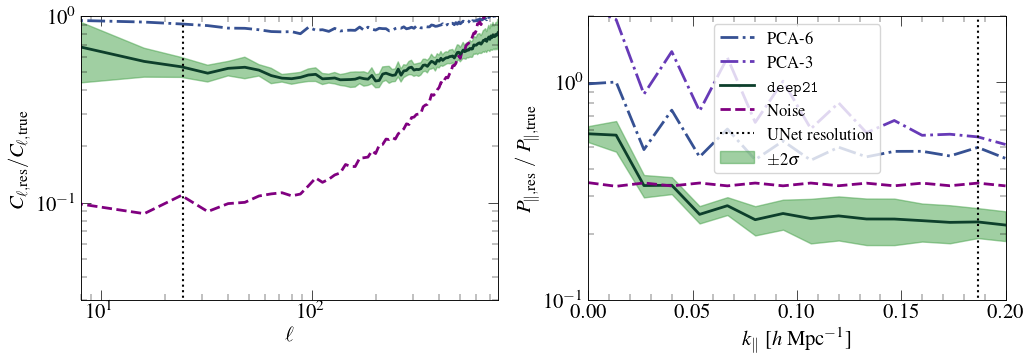

355


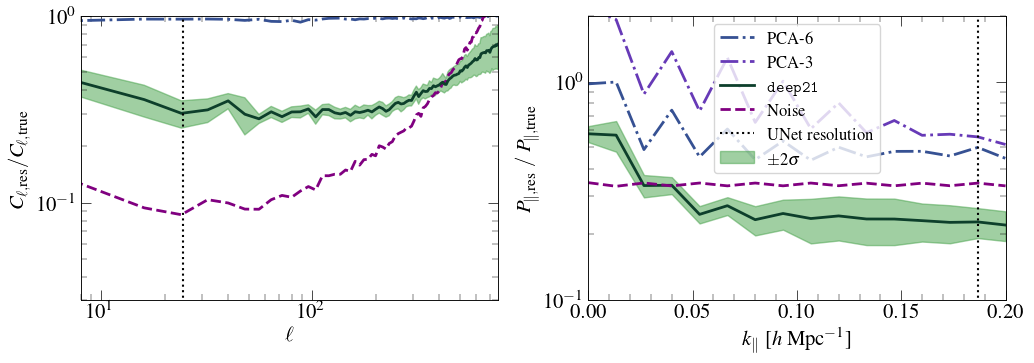

358


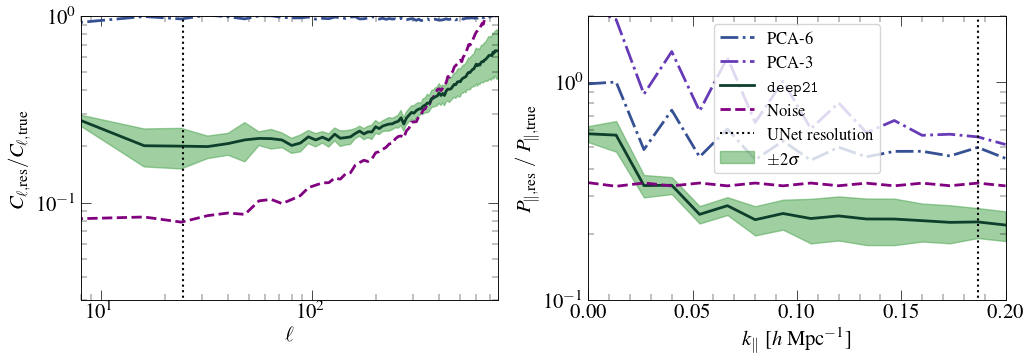

361


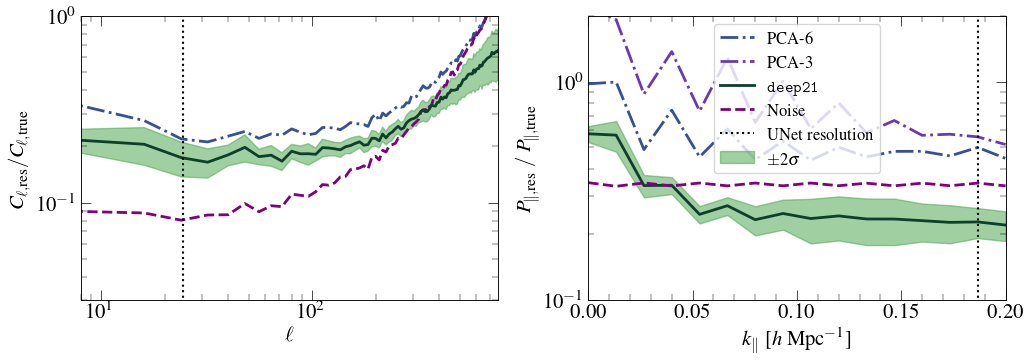

365


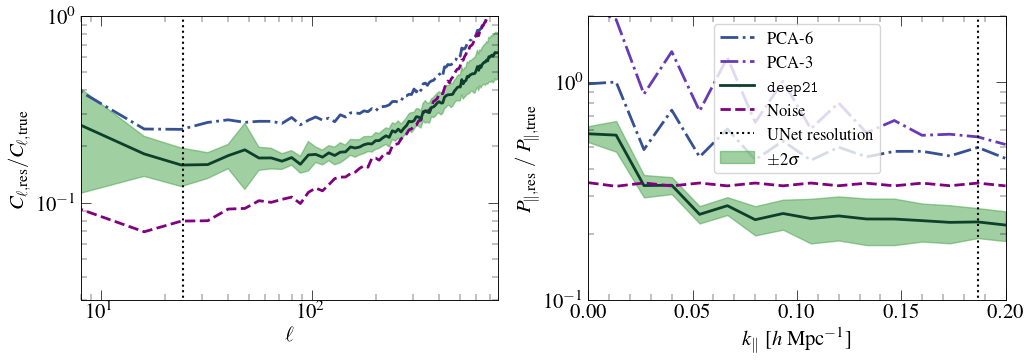

368


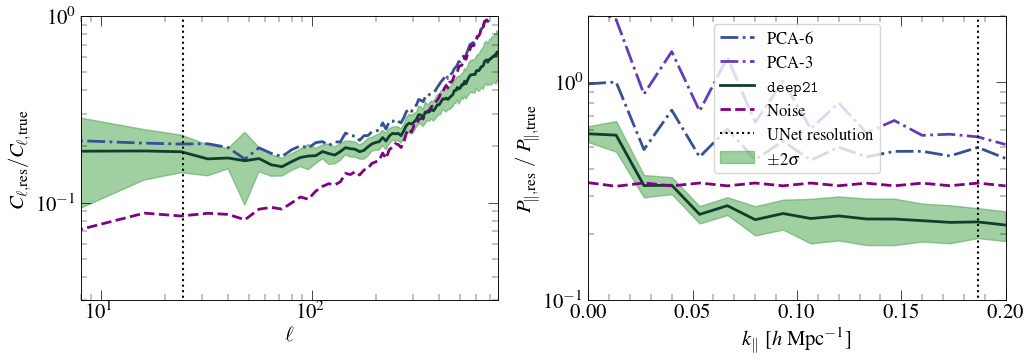

372


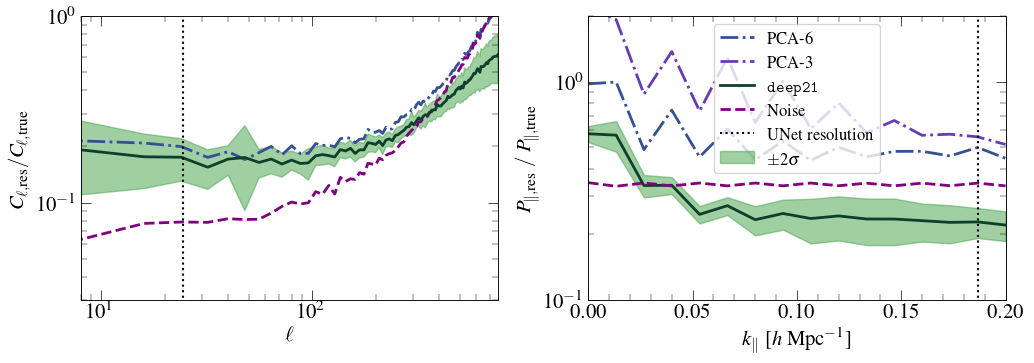

375


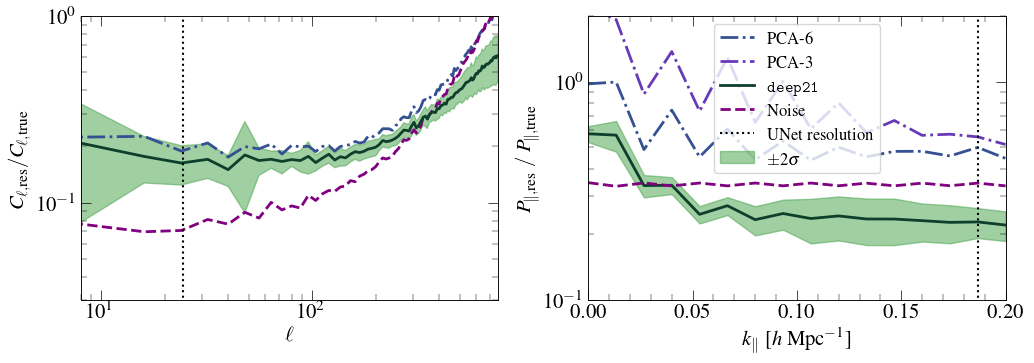

379


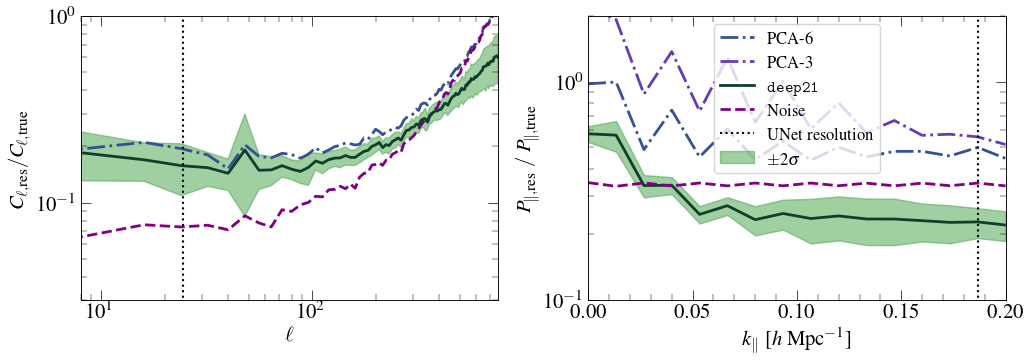

382


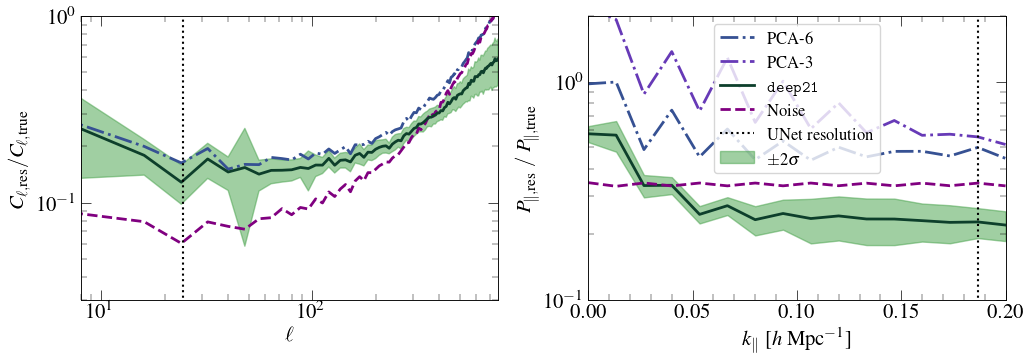

386


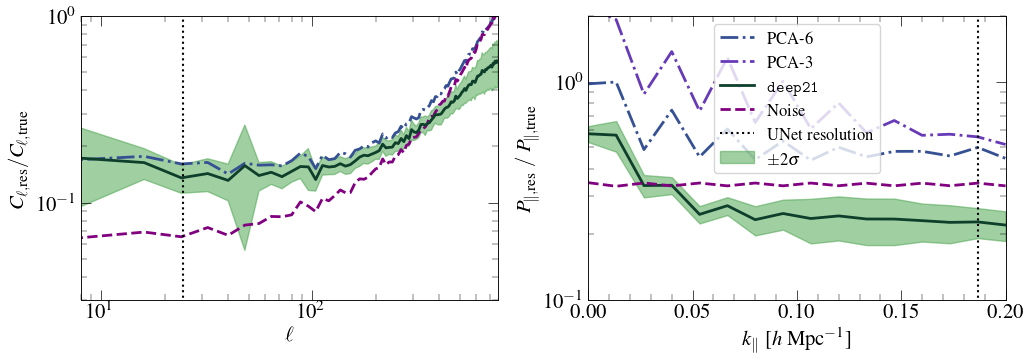

389


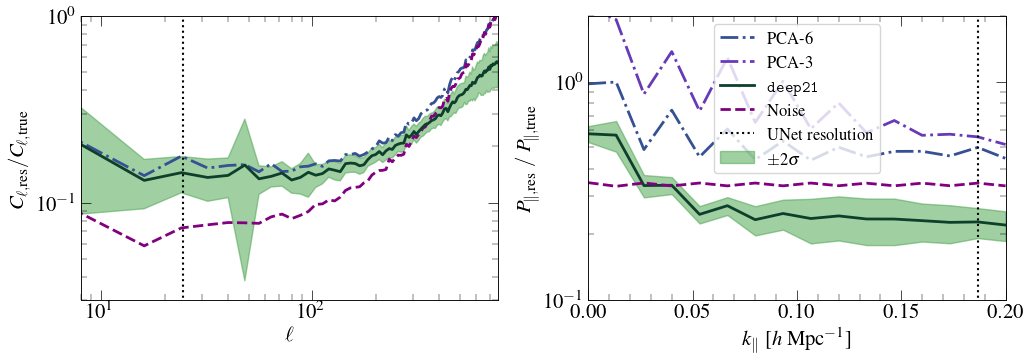

393


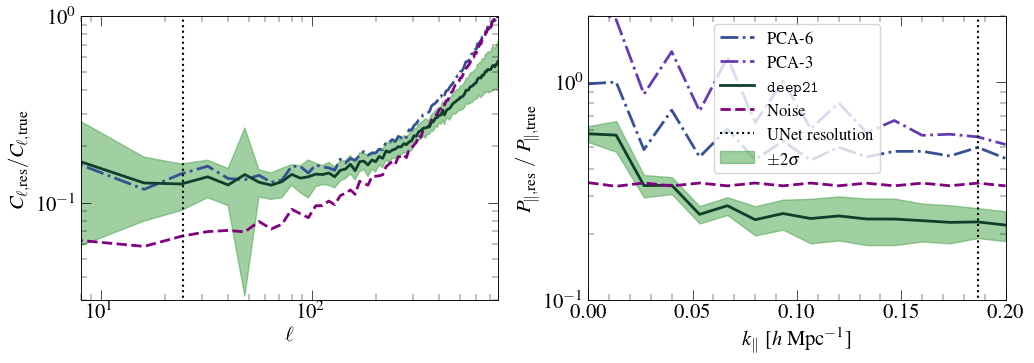

396


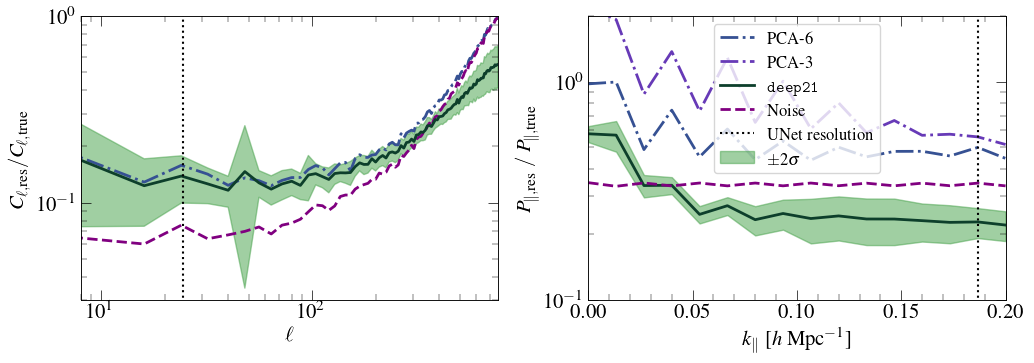

400


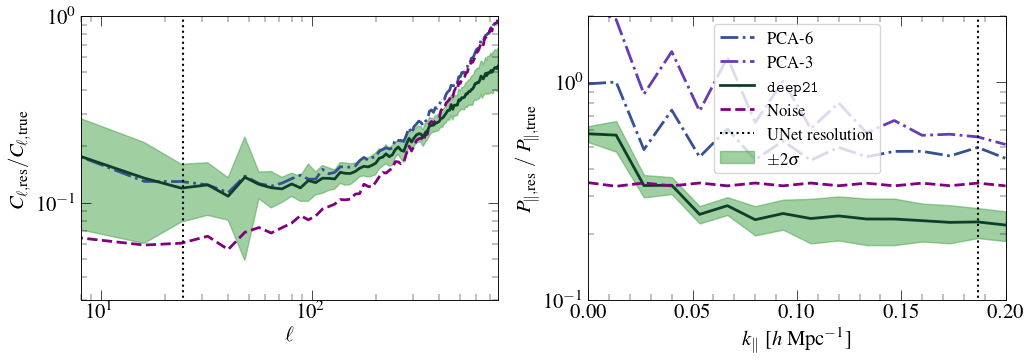

404


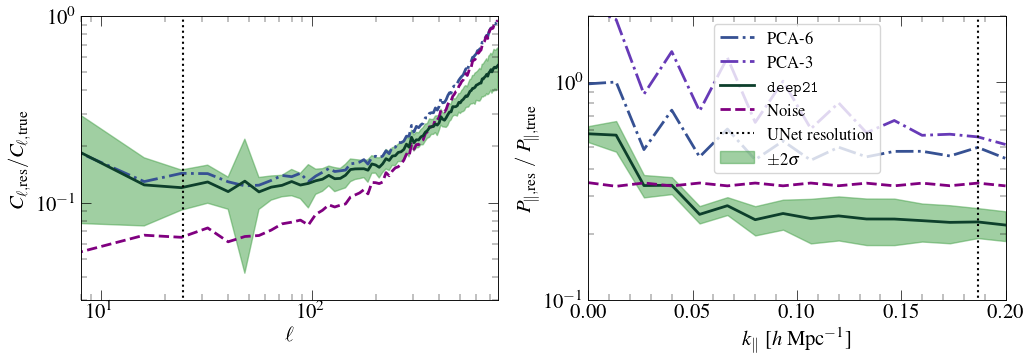

407


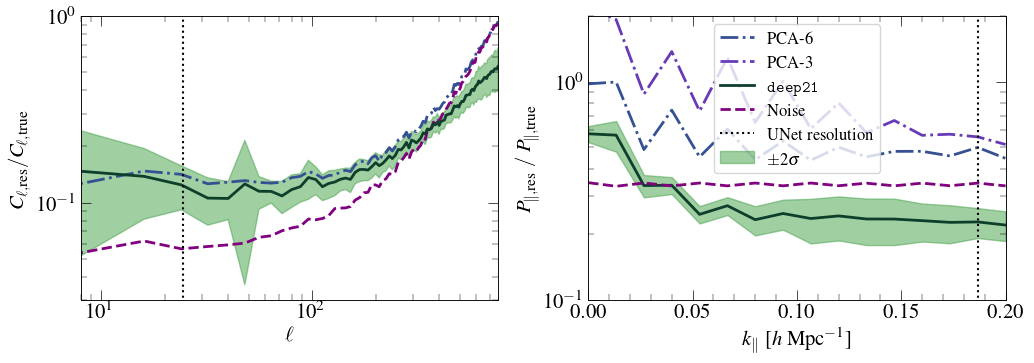

411


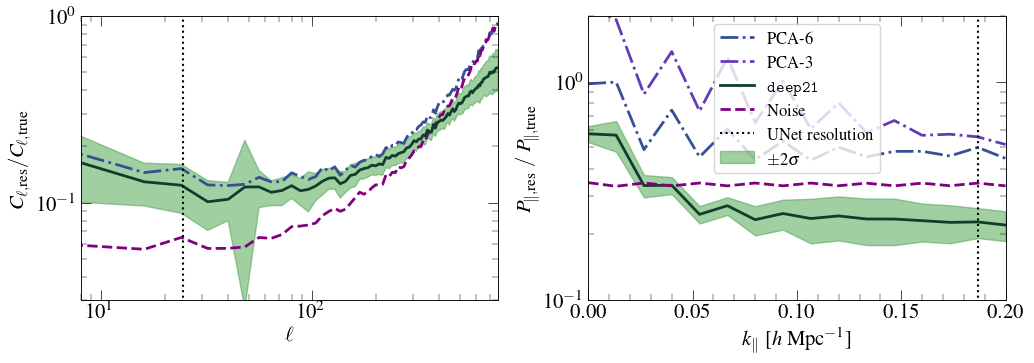

415


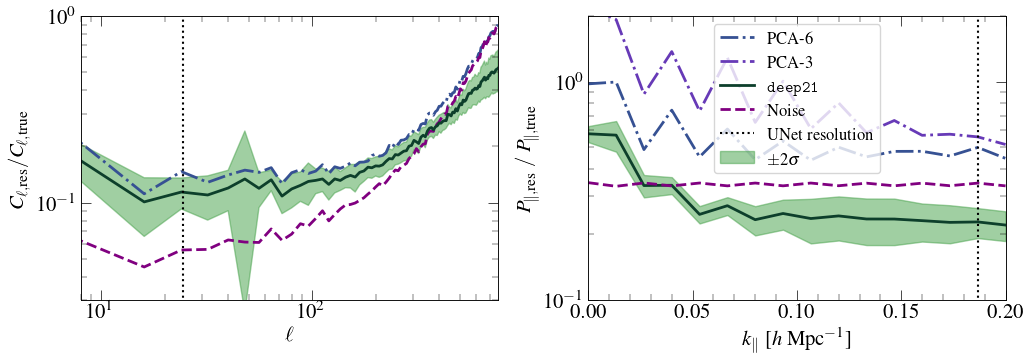

418


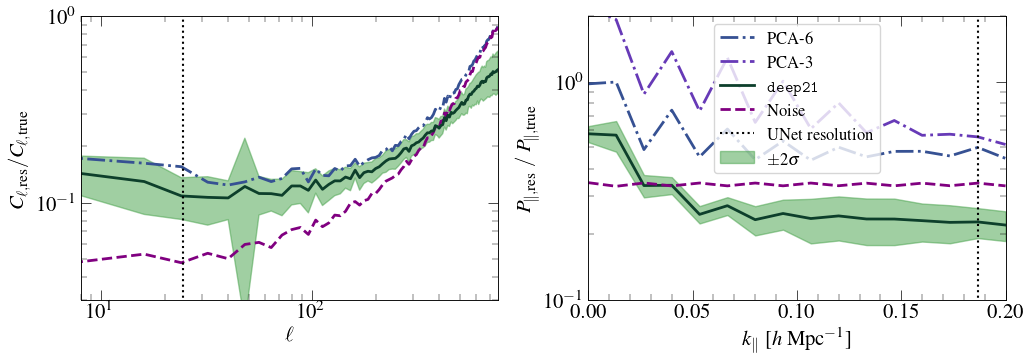

422


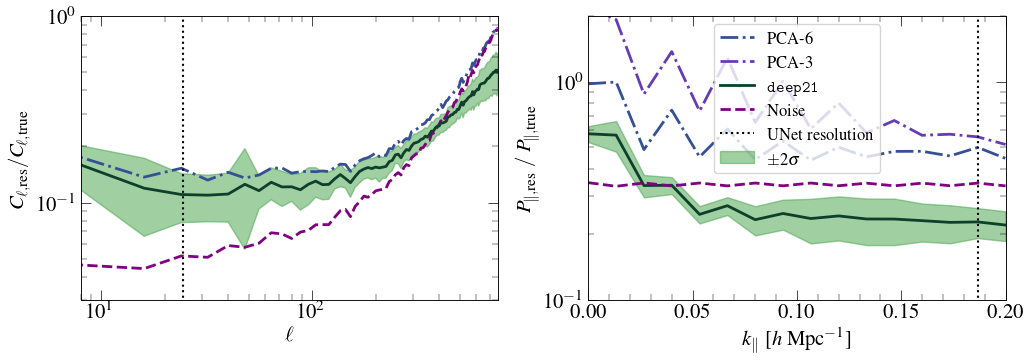

426


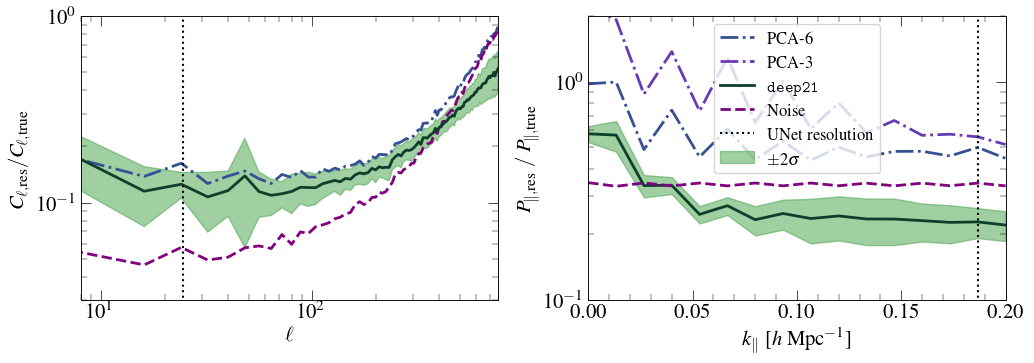

430


433


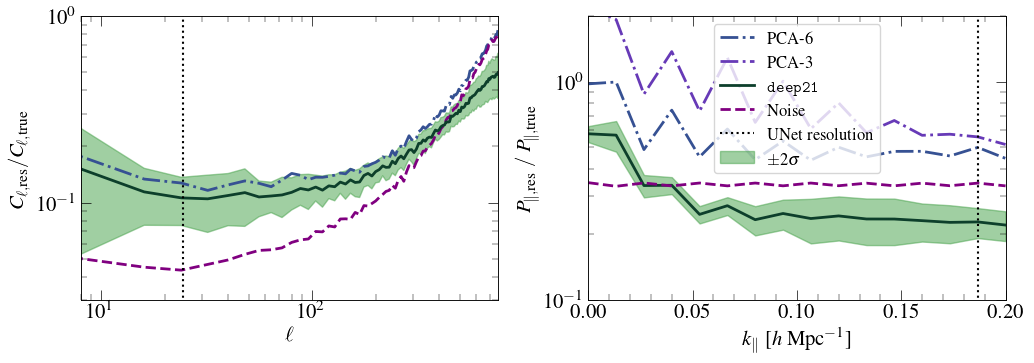

437


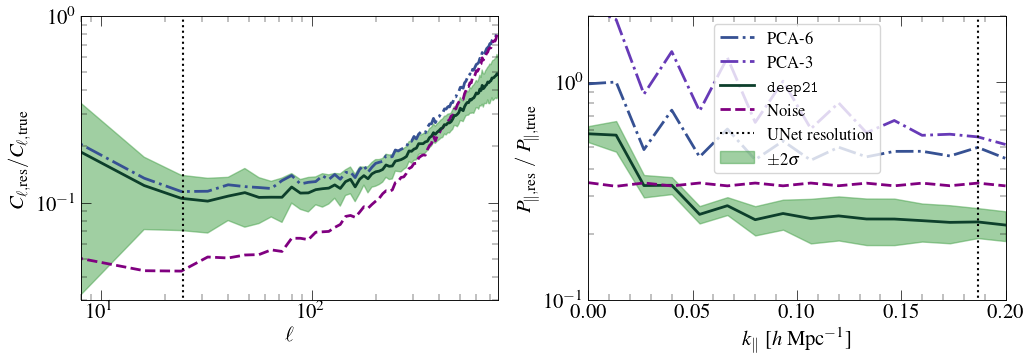

441


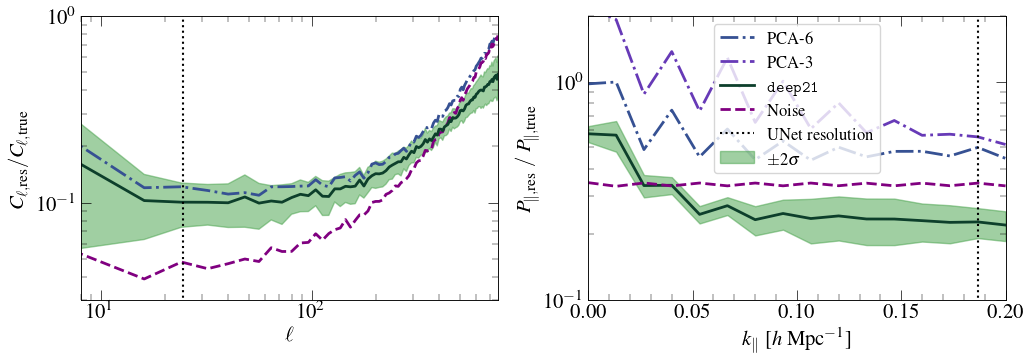

445


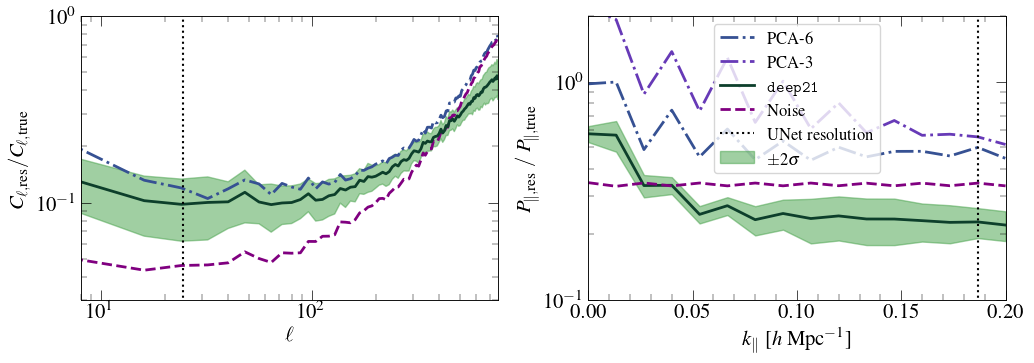

449


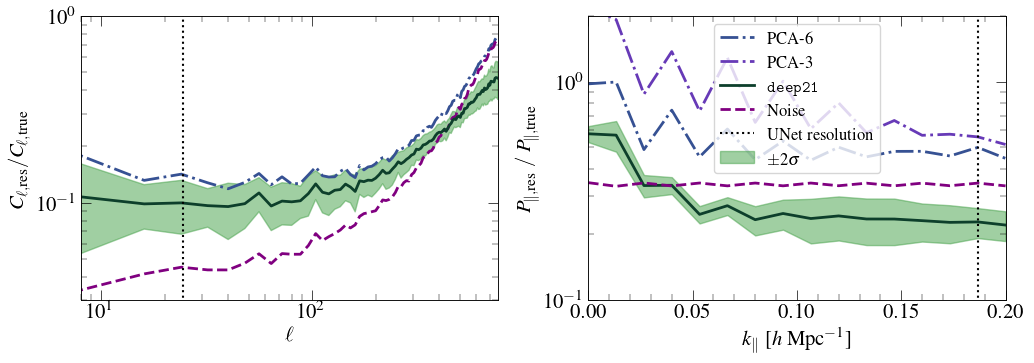

453


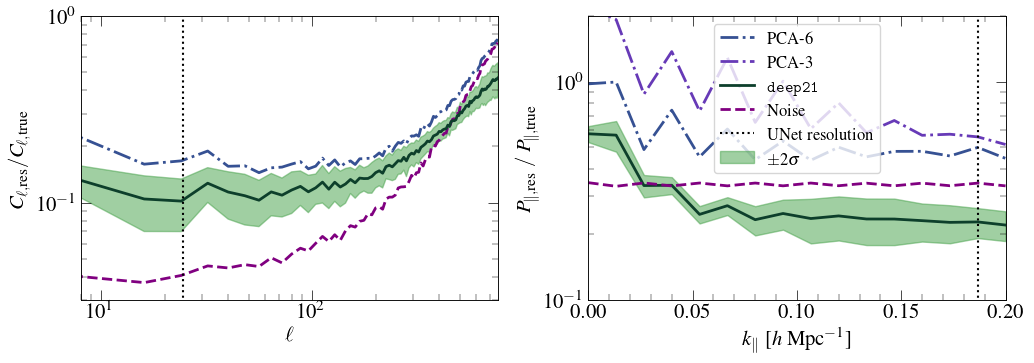

456


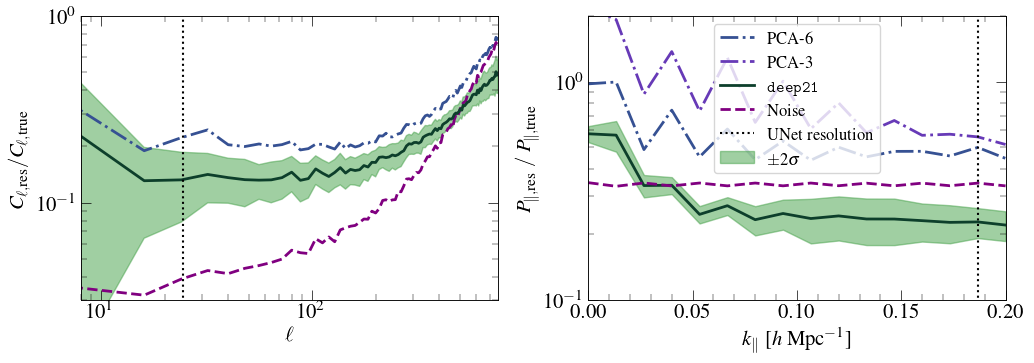

460


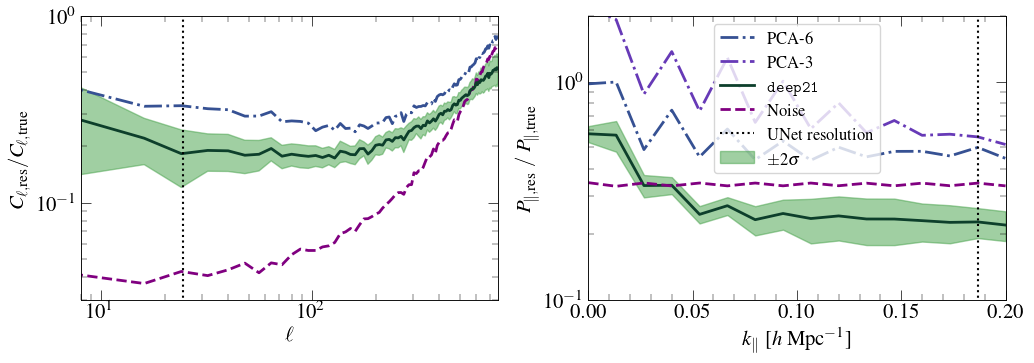

In [97]:
nn_res_all, save_pca_res, noise_res_all = dubplot(np.arange(31))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


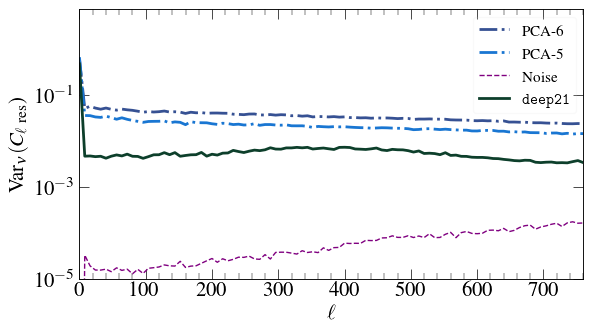

In [127]:
nn_res_all 
latexify(fig_width=6.5, fig_height=3.5)
std_nn = np.var(nn_res_all, axis=0)
cs = ["#365193", colors[0]]
labs = ['PCA-6', 'PCA-5']      
for i in range(2):
    std_pca = np.var(save_pca_res[i], axis=0) 
    plt.plot(np.arange(767)[::8], std_pca[1::8], c=cs[i],label=labs[i], linewidth=2, linestyle='dashdot')  
    
plt.plot(np.arange(767)[::8], np.var(noise_res_all, axis=0)[::8], c='purple',label="Noise", linestyle='--')  

plt.plot(np.arange(767)[::8], std_nn, c='#0D3F2B',label="\\texttt{deep21}", linewidth=2, linestyle='solid')     
plt.ylabel(r'Var$_\nu(C_{\ell\rm\ res}$)', fontsize=15)
plt.xlabel(r'$\ell$', fontsize=15)
plt.ylim(1e-5, 7.5e0)
plt.legend(fontsize=11, loc='upper right', framealpha=0.1)
plt.yscale('log')
                      

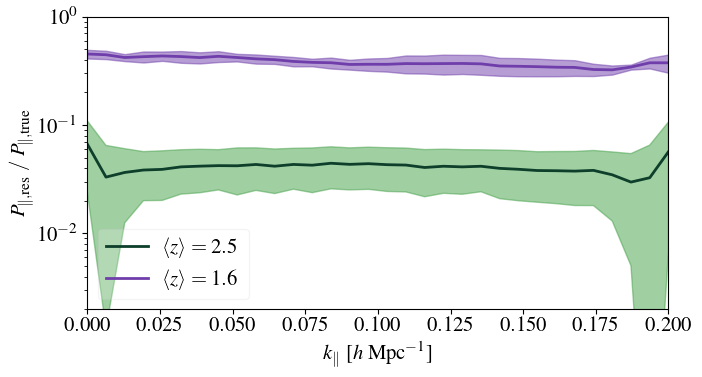

In [120]:
# COMPARE RADIAL POWER SPECTRA ACROSS BINS:

plt.style.use('default')
latexify(fig_width=7.5, fig_height=3.8)
#plt.style.use('./MNRAS_Style.mplstyle')
#sns.set_palette(sns.color_palette("deep", 8))

cs = ["#365193", colors[0]]
labs = ['PCA-6', 'PCA-5']   

ig,ax = plt.subplots(1,1) 

mu_deep21 = np.average(ens_res_arr, axis=0, weights=np.array(w))
sig_deep21 = weighted_std(ens_res_arr, axis=0, weights=np.array(w))

ax.plot(k_para, mu_deep21, c='#0D3F2B', label=r'$\langle z \rangle = 2.5$', linewidth=2)

ax.fill_between(k_para,
          mu_deep21 + 1*sig_deep21, 
          mu_deep21 - 1*sig_deep21, 
          color=colors[1], alpha=0.5)#, label=r'$\pm 2\sigma$')


# now load from bin 2

mu_deep21 = np.load('./bin2-comp/mean_bin2_rad.npy')
sig_deep21 = np.load('./bin2-comp/sigma_bin2_rad.npy')

ax.plot(k_para, mu_deep21, c='#6F3EAB', label=r'$\langle z \rangle = 1.6$', linewidth=2)

ax.fill_between(k_para,
          mu_deep21 + 1*sig_deep21, 
          mu_deep21 - 1*sig_deep21, 
          color='#6F3EAB', alpha=0.5)#, label=r'$\pm 2\sigma$')


# for j,pca_res_arr in enumerate(pca_radial_residuals):

#     ax.plot(k_para, pca_res_arr, c=cs[j], label=labs[j], linewidth=2, linestyle='dashdot')
ax.set_ylim(2e-3, 1e0)
#ax.set_title(r'$\langle z \rangle = 2.5$', fontsize=15)
ax.set_ylabel(r"$P_{\parallel,\rm {res}}\ / \ P_{\parallel,\rm {true}} $")
ax.set_xlabel(r'$k_\parallel\ $[$h$ Mpc$^{-1}$]')
ax.set_yscale('log')
ax.legend(framealpha=0.2)


In [31]:
MAP_NSIDE = 256
SIM_NSIDE = MAP_NSIDE
WINDOW_NSIDE = 8
NUM_SIMS = 1
# resolution of the outgoing window
NPIX_WINDOW = (MAP_NSIDE/WINDOW_NSIDE)**2
# actual side length of window
WINDOW_LENGTH = int(np.sqrt(NPIX_WINDOW))

In [32]:
from scipy.signal import correlate

In [ ]:
#inds_nest = np.arange(len(truth.T[15].T.flatten()))
#inds_ring = hp.nest2ring(MAP_NSIDE, inds_nest)
rearr = np.load('rearr_nside8.npy')
predicted = y_preds[0][:768]
truth = y_true[:768]
p6_ = pca6[:768]

In [89]:
nu = 2
t = truth.T[nu].T.flatten()[rearr]
pr = predicted.T[nu].T.flatten()[rearr]
p6 = p6_.T[nu].T.flatten()[rearr]
crosscorr_pca = hp.sphtfunc.anafast(t, p6)
crosscorr_pred = hp.sphtfunc.anafast(t, pr)

In [91]:
len(crosscorr_pca)

768

(32, 32)


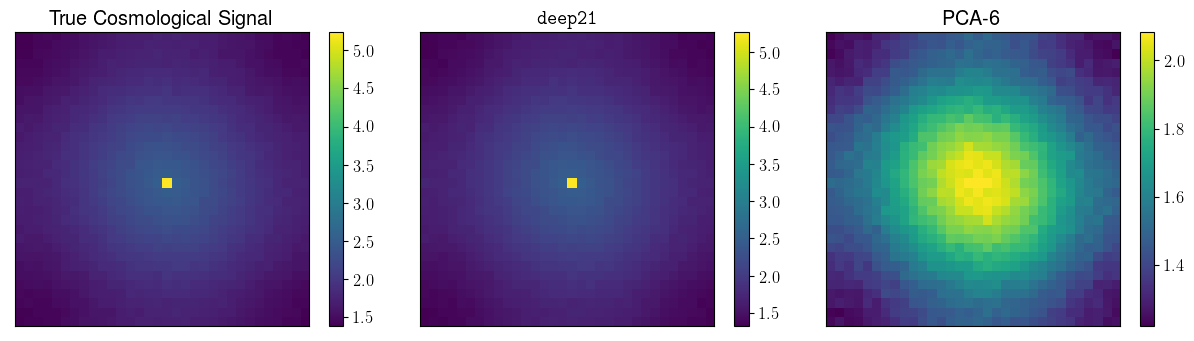

In [69]:
plt.style.use('default')
y_pred = y_preds[2]

plt.rc('font', **{'size': 12, 'sans-serif': ['Helvetica'], 'family': 'sans-serif'})                                          
#plt.rc("text.latex", preamble=["\\usepackage{helvet}\\usepackage[T1]{fontenc}\\usepackage{sfmath}"])
plt.rc("text", usetex=True)
plt.rc('ps', usedistiller='xpdf')
plt.rc('savefig', **{'dpi': 300})

nui = 2
(psd2D_true,psd2D_PCA,psd2D_NN) = (np.zeros((32,32)),np.zeros((32,32)),np.zeros((32,32)))

for k in range(768):
    F1 = fftpack.fft2(y_true[k].T[nui].T)
    F2 = fftpack.fftshift( F1 )
    psd2D_true += (np.abs( F2 )**2)/768
    F1 = fftpack.fft2(pca6[k].T[nui].T)
    F2 = fftpack.fftshift( F1 )
    psd2D_PCA += (np.abs( F2 )**2)/768
    F1 = fftpack.fft2(y_pred[k].T[nui].T)
    F2 = fftpack.fftshift( F1 )
    psd2D_NN += (np.abs( F2 )**2)/768

fig = plt.figure(figsize=(16,4))
pick = 123
ax1 = plt.subplot(131)
plt.imshow(np.log10(psd2D_true))
plt.colorbar()
ax1.set_xticks([])
ax1.set_yticks([])
plt.title("True Cosmological Signal")
ax1 = plt.subplot(132)
plt.imshow(np.log10(psd2D_NN))
plt.colorbar()
ax1.set_xticks([])
ax1.set_yticks([])
plt.title(r"\texttt{deep21}")
ax1 = plt.subplot(133)
plt.imshow(np.log10(psd2D_PCA))
plt.colorbar()
ax1.set_xticks([])
ax1.set_yticks([])
plt.title("PCA-6")
plt.gcf().set_size_inches((3.7* 3.37, 3.37))
plt.tight_layout()
print (psd2D_true.shape)

In [97]:
(x) = (np.arange(32)-32)
(xg,yg) = np.meshgrid(x,x)
R = np.sqrt(xg**2 + yg**2).flatten()
psdf_true = psd2D_true.flatten()
psdf_NN = psd2D_NN.flatten()
psdf_PCA = psd2D_PCA.flatten()
cuts = np.array([0,4,8,12,16,20,24,28,31])
(outd,outP_true,outP_NN,outP_PCA) = ([],[],[],[])
for i in range(len(cuts)-1):
    selecs = np.intersect1d(np.where(R<cuts[i+1]),np.where(R>cuts[i]))
    outd.append(np.sum(R[selecs])/len(selecs))
    outP_true.append(np.sum(psdf_true[selecs])/len(selecs))
    outP_NN.append(np.sum(psdf_NN[selecs])/len(selecs))
    outP_PCA.append(np.sum(psdf_PCA[selecs])/len(selecs))
(outd,outP_true,outP_NN,outP_PCA) = (np.array(outd),np.array(outP_true),np.array(outP_NN),np.array(outP_PCA))

In [129]:
theta = outd*(hp.nside2resol(4)*(180/np.pi)/64)

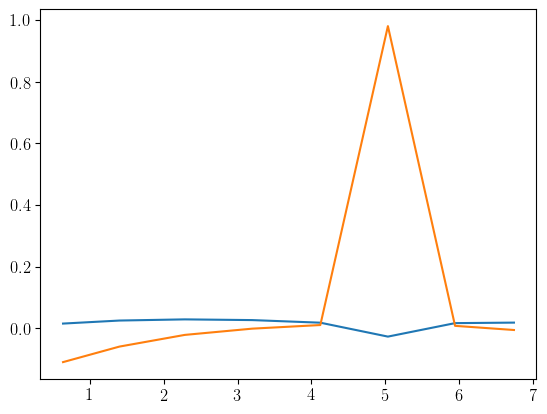

In [130]:
plt.plot(theta,np.log10(outP_true)-np.log10(outP_NN))
plt.plot(theta,np.log10(outP_true)-np.log10(outP_PCA))
#np.savetxt("powspec.txt",np.array([theta,outP_true,outP_NN,outP_PCA]).T)

In [ ]:
        
# ## COMBINE RESULTS ##

# # get ensemble average and std
# nn_radial = np.average(ensemble_ps, axis=0, weights=w)
# nn_std = weighted_std(ensemble_ps, axis=0, weights=w)

# # get ensemble RESIDUAL average and std
# nn_res_av = np.average(ensemble_res, axis=0, weights=w)
# nn_res_std = weighted_std(ensemble_res, axis=0, weights=w)

    
# # now average all 10 skies together
# ps_pca6 = np.average(pca6_radial, axis=0)
# ps_pca5 = np.average(pca5_radial, axis=0)
# ps_true = np.average(cosmo_radial, axis=0)
# ps_pred = np.average(nn_radial, axis=0)

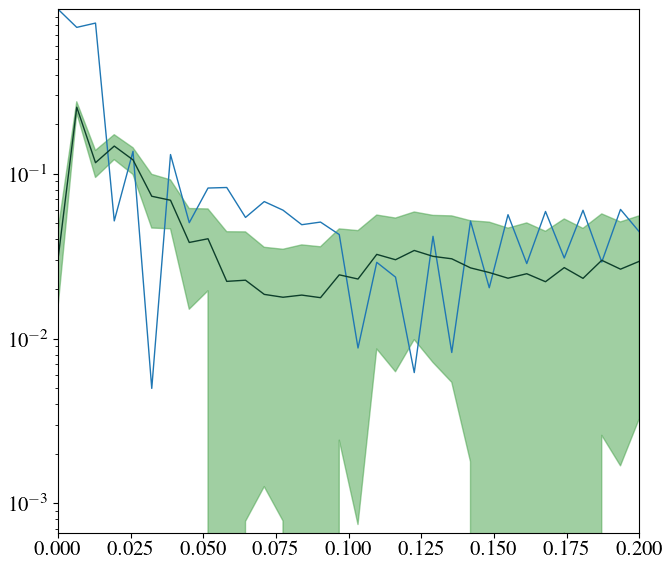

In [35]:
plt.plot(k_para, np.abs(ps_true - ps_pca6) / ps_true)
plt.plot(k_para, nn_res_av, color='#0D3F2B')

plt.fill_between(k_para,
          nn_res_av + 1*nn_res_std, 
          nn_res_av - 1*nn_res_std, 
          color=colors[1], alpha=0.5)
plt.yscale('log')

In [189]:
ps_sig = np.sqrt(np.sum([sg**2 for sg in nn_std], axis=0))
ps_sig

0.27452822424561346

In [198]:
nn_std + nn_radial

array([11.8881437 ,  0.64569462,  0.87533608,  0.74282094,  0.78595018,
        0.80917032,  0.81750391,  0.83653546,  0.83453614,  0.84827104,
        0.84665545,  0.85717111,  0.85370479,  0.85304598,  0.84977644,
        0.83642709,  0.83180178,  0.83051022,  0.8263688 ,  0.82344533,
        0.82039869,  0.82207783,  0.81865363,  0.82239445,  0.81915095,
        0.8220136 ,  0.81864579,  0.81986434,  0.81620133,  0.81830683,
        0.81291784,  1.15879598])

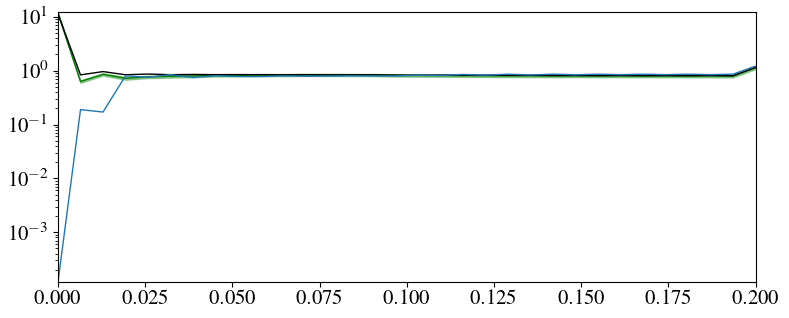

In [128]:
plt.plot(k_para, (nn_radial), color='g')
plt.fill_between(k_para,
          nn_radial + 2*nn_std, 
          nn_radial - 2*nn_std, 
          color=colors[1], alpha=0.5)

plt.plot(k_para, (ps_true), color='k')
plt.plot(k_para, (ps_pca6))
plt.yscale('log')
plt.show()

In [22]:
from scipy import fftpack

In [ ]:
fftpack.rfft(j)

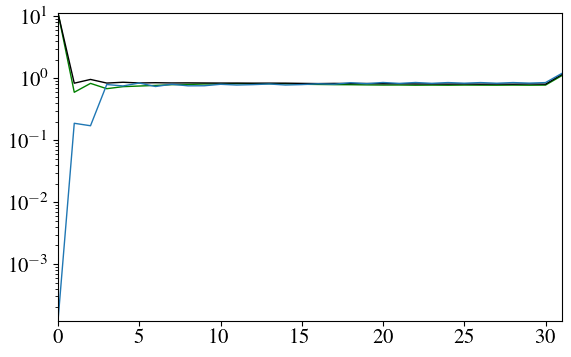

In [23]:
y_pred_flat = np.reshape(y_preds[0][:768],(768*32*32,32))
ps_pred = np.sum(np.array([np.abs(fftpack.rfft(j)) for j in y_pred_flat]),axis=0)/(768*32*32)
y_test_flat = np.reshape(y_true[:768],(768*32*32,32))
ps_true = np.sum(np.array([np.abs(fftpack.rfft(j)) for j in y_test_flat]),axis=0)/(768*32*32)
x_test_flat = np.reshape(pca6[:768],(768*32*32,32))
ps_pca = np.sum(np.array([np.abs(fftpack.rfft(j)) for j in x_test_flat]),axis=0)/(768*32*32)

plt.plot((ps_pred), color='g')
plt.plot((ps_true), color='k')
plt.plot((ps_pca))
plt.yscale('log')
plt.show()

In [24]:
# ## COMBINE RESULTS ##

# # get ensemble average and std
# nn_radial = np.average(ensemble_ps, axis=0, weights=w)
# nn_std = weighted_std(ensemble_ps, axis=0, weights=w)

nn_transfer = np.average([np.sqrt(ensi / ps_true) for ensi in ensemble_ps], axis=0, weights=w_logp)
nn_tr_std = weighted_std([np.sqrt(ensi / ps_true) for ensi in ensemble_ps], axis=0, weights=w_logp)


In [27]:
from scipy.stats import pearsonr

In [28]:
# compute correlation pow spec
pred_r = []

y_test_flat = np.reshape(y_true[:7680],(7680*32*32,32)).T
for y_pred in y_preds:

    y_pred_flat = np.reshape(y_pred[:7680],(7680*32*32,32)).T
    pred_x_true = (np.array([pearsonr(y_pred_flat[j], y_test_flat[j]) for j in range(len(y_pred_flat))]))#/(768*32*32)
    pred_r.append(pred_x_true)
    
y_noisy_flat = np.reshape(y_noisy[:7680],(7680*32*32,32)).T
noise_x_true = (np.array([np.abs(pearsonr(y_noisy_flat[j], y_test_flat[j])) for j in range(len(y_pred_flat))]))#/(768*32*32)
pca_flat = np.reshape(pca6[:7680],(7680*32*32,32)).T
pca_x_true = (np.array([np.abs(pearsonr(pca_flat[j], y_test_flat[j])) for j in range(len(y_pred_flat))]))#/(768*32*32)

In [29]:
corr_avg = 1 - np.average([p.T[0] for p in pred_r], weights=w_logp, axis=0)
corr_std = weighted_std([p.T[0] for p in pred_r], weights=w_logp, axis=0)

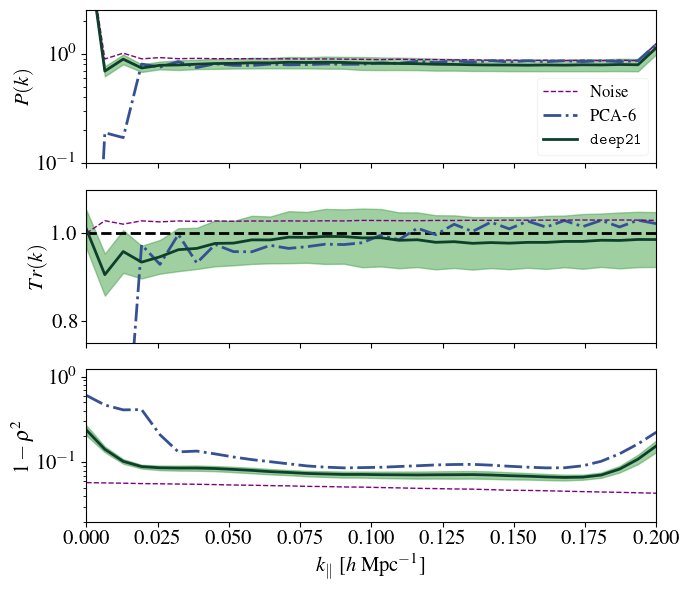

In [31]:
latexify(7, 6)

cs = ["#365193", colors[0]]
labs = ['PCA-6', 'PCA-5']   

#plt.subplot(211)
fig,axs = plt.subplots(3, 1, sharex=True)


# POWER SPECTRUM

ax = axs[0]

       
ax.plot(k_para, ps_noise, color='purple', label = 'Noise', linestyle='--')
       
ax.plot(k_para, ps_pca6,  
         c=cs[0], label=labs[0], linewidth=2, linestyle='dashdot')

ax.plot(k_para, nn_radial, color='#0D3F2B', label=r'$\texttt{deep21}$', linewidth=2)

ax.fill_between(k_para,
      nn_radial + 2*nn_std, 
      nn_radial - 2*nn_std, 
      color=colors[1], alpha=0.5)#, label=r'$\pm 2\sigma$')


ax.set_ylabel(r"$P(k) $")
#ax.set_xlabel(r'$k_\parallel\ $[$h$ Mpc$^{-1}$]')
ax.set_yscale('log')
ax.set_ylim(1e-1, 2.5)
#ax.set_xticks([])

ax.legend(framealpha=0.2, loc='lower right', fontsize=12)

# TRANSFER FUNCTION

ax = axs[1]



ax.plot(k_para, np.ones(32) ,color='k', linestyle='--', linewidth=2, label='Truth')
ax.plot(k_para, np.sqrt(ps_pca6 / ps_true), 
         linewidth=2, c=cs[0], label=r'PCA-6', linestyle='dashdot')

ax.plot(k_para, np.sqrt(ps_noise / ps_true), color='purple', label = 'Noise', linestyle='--')

# plt.plot(k_para, np.sqrt(ps_pca5 / ps_true), 
#          linewidth=2, c=cs[0], label=r'PCA-5', linestyle='dashdot')

# plt.plot(k_para, np.sqrt(ps_pred / ps_true), 
#          linewidth=2, c=cs[1], label=r'unet')

#av = np.average(pred_pow_spec_arr, axis=0, weights=w)
#trs = [np.sqrt(p / np.mean(cosmo_power_specs, axis=0)) for p in pred_pow_spec_arr]
#sg = weighted_std(trs, w, axis=0)



ax.fill_between(k_para,
          nn_transfer + 2*nn_tr_std, 
          nn_transfer - 2*nn_tr_std, 
          color=colors[1], alpha=0.5, label=r'$\pm 2\sigma$')
ax.plot(k_para, nn_transfer, 
         c='#0D3F2B', linewidth=2, label=r'\texttt{deep21}')
ax.set_ylim(0.75, 1.1)
ax.set_ylabel(r'$Tr(k)$')

#ax.set_xlabel(r'$k_\parallel\ $[$h$ Mpc$^{-1}$]')
#ax.set_xticks([])



# CORRELATION FUNCTION
#plt.subplot(212)
ax = axs[2]



ax.fill_between(k_para,
          (corr_avg + 2*corr_std), 
          (corr_avg - 2*corr_std), 
          color=colors[1], alpha=0.5)
                 #, label=r'$\pm 2\sigma$')
ax.plot(k_para, corr_avg, 
         c='#0D3F2B', linewidth=2, label=r'\texttt{deep21}')


ax.plot(k_para, 1 - pca_x_true.T[0], color=cs[0],  label=r'PCA-6',
         linewidth=2, linestyle='dashdot')
ax.plot(k_para, 1 - noise_x_true.T[0], color='purple', label = 'Noise', linestyle='--')
ax.set_ylabel(r'$1 - \rho^2$')
ax.set_yscale('log')
ax.set_xlabel(r'$k_\parallel\ $[$h$ Mpc$^{-1}$]')

ax.set_ylim(2e-2, 1.22)


plt.tight_layout()



#plt.yscale('log')

(0.06, 1)

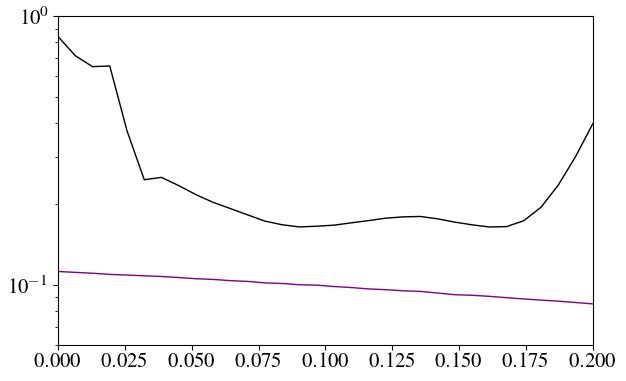

In [37]:
latexify()
# for i in range(5):
#     plt.plot(k_para, 1-pred_r[i].T[0]**2, color='g')



plt.plot(k_para, 1 - pca_x_true.T[0]**2, color='k')
plt.plot(k_para, 1 - noise_x_true.T[0]**2, color='purple')
plt.yscale('log')
plt.ylim(6e-2, 1)

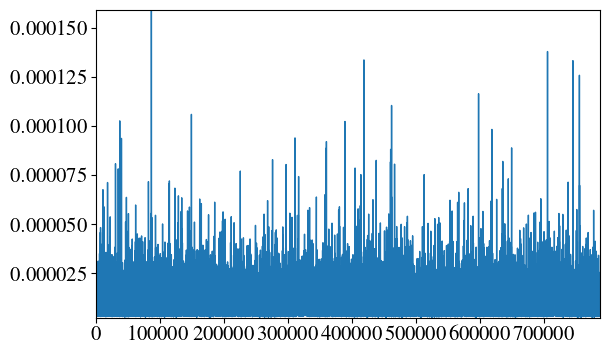

In [237]:
plt.plot(pred_x_true)

In [71]:
def cf(x, y, length=32):
    length = len(x) - 1
    return np.array([1]+[np.corrcoef(x[:-i], y[i:])[0,1]  \
        for i in range(1, length)])

In [66]:
rearr = np.load('rearr_nside8.npy')
pred_map = y_preds[0][:768].T[2].T.flatten()[rearr]
true_map = y_true[:768].T[2].T.flatten()[rearr]
pca_map = pca6[:768].T[2].T.flatten()[rearr]

In [67]:
pred_map.shape

(786432,)

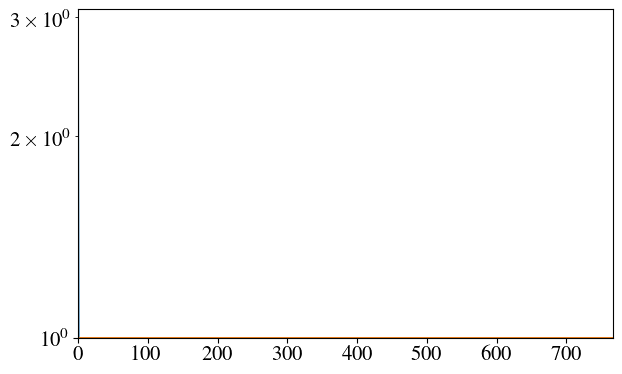

In [71]:
plt.plot( hp.sphtfunc.anafast(true_map, map2=true_map))
plt.plot(hp.sphtfunc.anafast(pca_map, map2=true_map))
#plt.ylim(1e-7, 1e-4)
plt.yscale('log')

In [228]:
from scipy.signal import csd

cross = csd(y_true.reshape(-1, 32), y_preds[0].reshape(-1, 32) )

/mnt/home/tmakinen/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 32, using nperseg = 32
  .format(nperseg, input_length))


In [70]:
delta = (nn_radial - ps_true) / ps_true
plt.plot(cf(nn_radial, ps_true))
delta = (ps_pca6 - ps_true) / ps_true
#
plt.plot(cf(ps_pca6, ps_true))
#plt.yscale('log')
#plt.ylim(0.001, 1.5)

NameError: name 'nn_radial' is not defined

In [96]:
from scipy.signal import coherence

In [93]:
predicted = np.concatenate((av[::-1], av), axis=-1)
cosmological = np.concatenate((np.mean(cosmo_power_specs, axis=0)[::-1], np.mean(cosmo_power_specs, axis=0)), axis=-1)

In [96]:
f, blah = coherence(predicted, cosmological)

In [99]:
f

array([0.      , 0.015625, 0.03125 , 0.046875, 0.0625  , 0.078125,
       0.09375 , 0.109375, 0.125   , 0.140625, 0.15625 , 0.171875,
       0.1875  , 0.203125, 0.21875 , 0.234375, 0.25    , 0.265625,
       0.28125 , 0.296875, 0.3125  , 0.328125, 0.34375 , 0.359375,
       0.375   , 0.390625, 0.40625 , 0.421875, 0.4375  , 0.453125,
       0.46875 , 0.484375, 0.5     ])

In [49]:
plt.plot(np.mean(cosmo_power_specs, axis=0))
plt.plot(np.mean(pred_pow_spec_arr, axis=0))

NameError: name 'cosmo_power_specs' is not defined

In [ ]:
# for angcosmo_power_specs

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


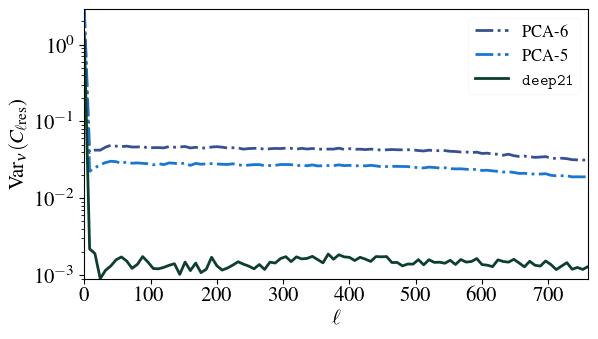

In [80]:
np.array(pca_radial_residuals[0]).shape

(10, 32)

In [84]:
np.array(pred_res_arr).shape

(5, 10, 32)

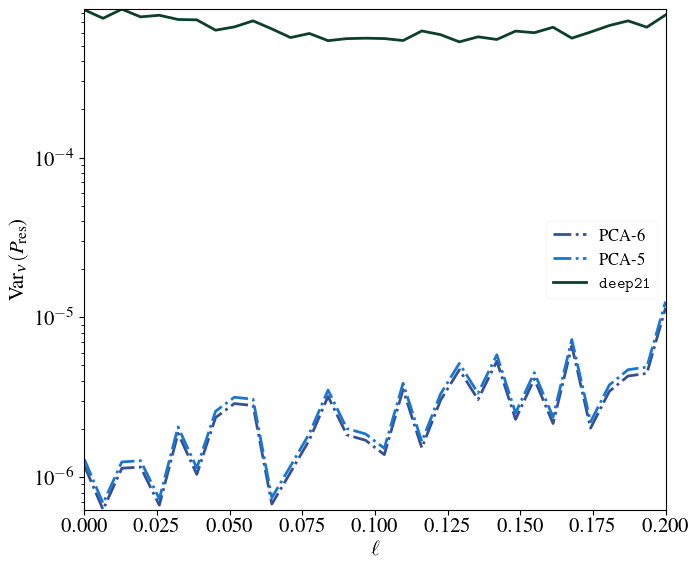

In [85]:
# for radial power spectrum
latexify(fig_width=7.5, fig_height=6.5)
std_nn = np.var(model_preds, axis=0)
cs = ["#365193", colors[0]]
labs = ['PCA-6', 'PCA-5']      
for i in range(2):
    std_pca = np.var(pca_radial_residuals[i], axis=0)
    plt.plot(k_para, std_pca, c=cs[i],label=labs[i], linewidth=2, linestyle='dashdot')  

plt.plot(k_para, std_nn, c='#0D3F2B',label="\\texttt{deep21}", linewidth=2, linestyle='solid')     
plt.ylabel(r'Var$_\nu(P_{\rm res}$)', fontsize=15)
plt.xlabel(r'$\ell$', fontsize=15)
plt.legend(fontsize=12, loc='best', framealpha=0.1)
plt.yscale('log')

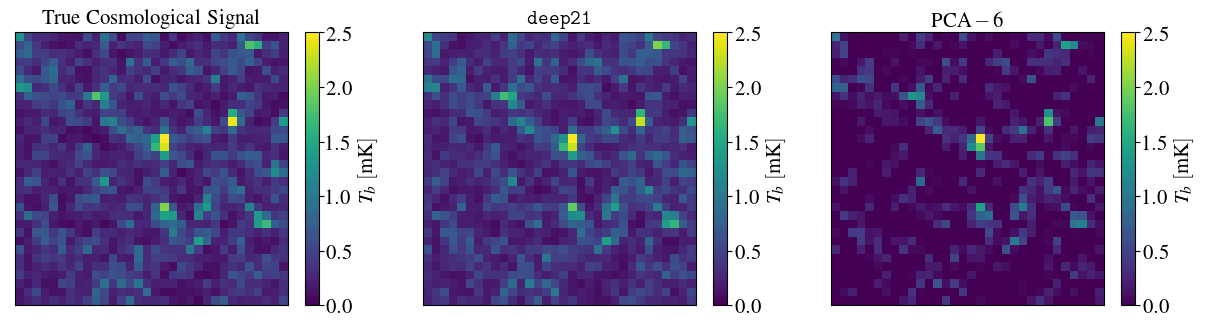

In [81]:
# now for a nice visual comparison of our 3D network:
xval_c1 = pca6[2].T #np.squeeze(y_preds[1][2]).transpose()
yval_c1 = np.squeeze(y_true[2]).transpose()
y_c1_pred = np.squeeze(ensemble_average[2]).transpose()

plt.rc('font', **{'size': 10, 'sans-serif': ['Helvetica'], 'family': 'sans-serif'})                                          
#plt.rc("text.latex", preamble=["\\usepackage{helvet}\\usepackage[T1]{fontenc}\\usepackage{sfmath}"])
plt.rc("text", usetex=True)
plt.rc('ps', usedistiller='xpdf')
plt.rc('savefig', **{'dpi': 300})


#plt.style.use('default')
#plt.style.use('./MNRAS_Style.mplstyle')
#plt.style.use('dark_background')
plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(17,4), facecolor=None)
pick = 12
#plt.style.use('dark_background')
ax1 = plt.subplot(131)
plt.imshow(yval_c1[pick], vmin=0, vmax=2.5)
cbar = plt.colorbar()
cbar.set_label(r'$T_b\ \rm [mK]$')
ax1.set_xticks([])
ax1.set_yticks([])
plt.title(r"$\rm True\ Cosmological\ Signal$")


ax1 = plt.subplot(132)
plt.imshow(y_c1_pred[pick], vmin=0, vmax=2.5)
cbar = plt.colorbar()
cbar.set_label(r'$T_b\ \rm [mK]$')

ax1.set_xticks([])
ax1.set_yticks([])
plt.title(r"\texttt{deep21}")
ax1 = plt.subplot(133)
plt.imshow(xval_c1[pick], vmin=0, vmax=2.5)
cbar = plt.colorbar()
cbar.set_label(r'$T_b\ \rm [mK]$')
ax1.set_xticks([])
ax1.set_yticks([])
plt.title(r"$\rm PCA-6 $")
plt.gcf().set_size_inches((3.7* 3.37, 3.37))
plt.tight_layout()

#plt.savefig("/mnt/home/tmakinen/repositories/21cm-unet/figures/baseline_cutout.png", transparent=True)

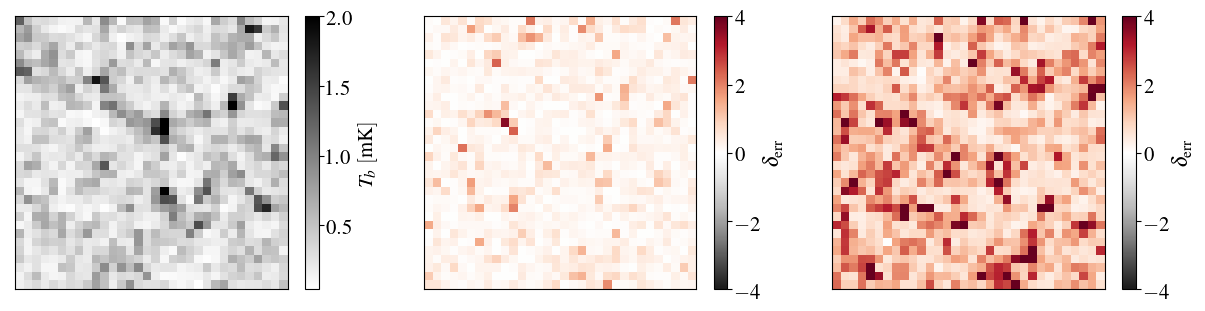

In [82]:
# now look at mesh residuals
# now for a nice visual comparison of our 3D network:
cmap_reversed = matplotlib.cm.get_cmap('RdGy_r')
yval_c1 = np.squeeze(y_true[2]).transpose() #/ np.sum(np.squeeze(y_true[2]).transpose())
xval_c1 = np.abs(pca6[2].T - yval_c1) / yval_c1

y_c1_pred = np.abs(np.squeeze(ensemble_average[2]).transpose() - yval_c1) / yval_c1

plt.rc('font', **{'size': 10, 'sans-serif': ['Helvetica'], 'family': 'sans-serif'})                                          
#plt.rc("text.latex", preamble=["\\usepackage{helvet}\\usepackage[T1]{fontenc}\\usepackage{sfmath}"])
plt.rc("text", usetex=True)
plt.rc('ps', usedistiller='xpdf')
plt.rc('savefig', **{'dpi': 300})


plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(17,4), facecolor=None)
pick = 12
#plt.style.use('dark_background')
ax1 = plt.subplot(131)
plt.imshow(yval_c1[pick], cmap='binary', vmax=2)
cbar = plt.colorbar()
cbar.set_label(r'$T_b\ \rm [mK]$')
ax1.set_xticks([])
ax1.set_yticks([])
#plt.title("True Cosmological Signal")

ax1 = plt.subplot(132)
plt.imshow(y_c1_pred[pick], cmap='RdGy_r', vmin=-4, vmax=4)
cbar = plt.colorbar()
cbar.set_label(r'$ \delta_{\rm err} $')
ax1.set_xticks([])
ax1.set_yticks([])
#plt.title(r"\texttt{deep21} Residual")
ax1 = plt.subplot(133)
plt.imshow(xval_c1[pick], cmap='RdGy_r', vmin=-4, vmax=4)
cbar = plt.colorbar()
cbar.set_label(r'$ \delta_{\rm err} $')
ax1.set_xticks([])
ax1.set_yticks([])
#plt.title("PCA-6 Residual")
plt.gcf().set_size_inches((3.7* 3.37, 3.37))
plt.tight_layout()
#plt.savefig("/mnt/home/tmakinen/repositories/21cm-unet/figures/baseline_cutout.png", transparent=True)

In [48]:
nu_arr[12]

392.61821

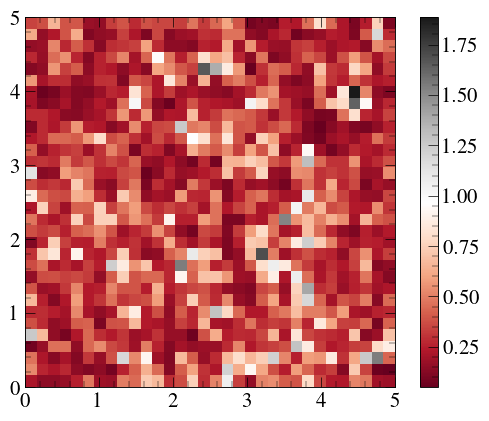

In [35]:
plt.imshow(yval_c1[pick], extent=[0,5,0,5], cmap='RdGy')
plt.colorbar()

In [21]:
import pickle

In [26]:
f = open('/mnt/home/tmakinen/jobs/nu_bin_1/model_clean_1/params', 'rb')
params = pickle.load(f)

In [27]:
params

{'n_filters': 16,
 'n_cubes_in': 1,
 'n_cubes_out': 1,
 'conv_width': 2,
 'network_depth': 5,
 'batch_size': 48,
 'num_epochs': 200,
 'act': 'relu',
 'lr': 0.0001,
 'batchnorm_in': True,
 'batchnorm_out': False,
 'batchnorm_up': False,
 'batchnorm_down': True,
 'momentum': 0.02,
 'out_dir': 'model_clean_1/',
 'data_path': '/mnt/home/tmakinen/ceph/data_ska/nu_bin_1/',
 'nu_indx': None,
 'load_model': False,
 'noise_level': None}

In [42]:
context1 = np.load('/mnt/home/tmakinen/ceph/data_ska/context/fg_nside1context_nnu032_sim001.npy')
context2 = np.load('/mnt/home/tmakinen/ceph/data_ska/context/fg_2context_nnu032_sim001.npy')

In [83]:
fg1 = context1.T[:32].T
con1 = context1.T[32:].T

fg2 = context2.T[:32].T
con2 = context2.T[32:].T

In [72]:
fg1.shape

(768, 32, 32, 32)

In [73]:
con1.shape

(768, 32, 32, 32)

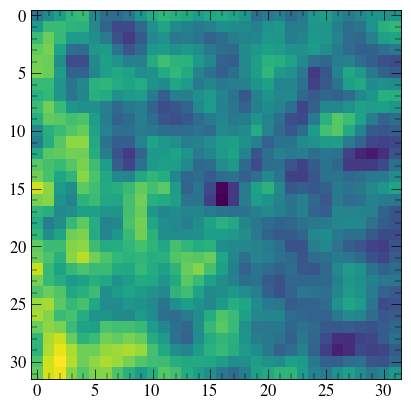

In [84]:
plt.imshow(fg2[100].T[2].T)


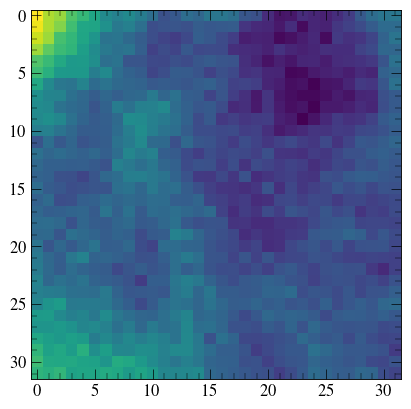

In [85]:
plt.imshow(con2[100].T[2].T)

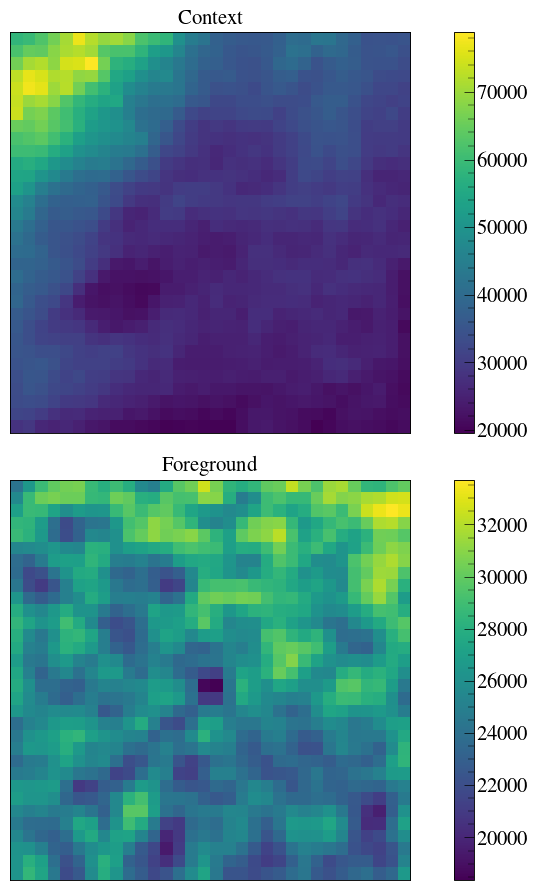

In [111]:
# now for a nice visual comparison of our 3D network:
xval_c1 = fg2[100].T #np.squeeze(y_preds[1][2]).transpose()
yval_c1 = np.squeeze(con1[100]).transpose()
#y_c1_pred = np.squeeze(ensemble_average[2]).transpose()

plt.rc('font', **{'size': 10, 'sans-serif': ['Helvetica'], 'family': 'sans-serif'})                                          
#plt.rc("text.latex", preamble=["\\usepackage{helvet}\\usepackage[T1]{fontenc}\\usepackage{sfmath}"])
plt.rc("text", usetex=True)
plt.rc('ps', usedistiller='xpdf')
plt.rc('savefig', **{'dpi': 300})

pick = 2

latexify(9, 9)

#plt.style.use('default')
#plt.style.use('./MNRAS_Style.mplstyle')
#plt.style.use('dark_background')


ax1 = plt.subplot(211)
plt.imshow(yval_c1[pick])
cbar = plt.colorbar()
#cbar.set_label(r'$T_b\ \rm [mK]$')

ax1.set_xticks([])
ax1.set_yticks([])
plt.title(r"$\rm Context$")
ax1 = plt.subplot(212)
plt.imshow(xval_c1[pick])
cbar = plt.colorbar()
#cbar.set_label(r'$T_b\ \rm [mK]$')
ax1.set_xticks([])
ax1.set_yticks([])
plt.title(r"$\rm Foreground $")
#plt.gcf().set_size_inches((3.7* 3.37, 3.37))
plt.tight_layout()

#plt.savefig("/mnt/home/tmakinen/repositories/21cm-unet/figures/baseline_cutout.png", transparent=True)